Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
anltdate="2020-11-23"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
#anltdate="2020-11-19"
#configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-11-23  Afghanistan_nan         0         203.0         478.0   
1  2020-11-23      Albania_nan         0         565.0        2138.0   
2  2020-11-23      Algeria_nan         0        1088.0        3210.0   
3  2020-11-23      Andorra_nan         0          49.0         190.0   
4  2020-11-23       Angola_nan         0          80.0         359.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1466.0              44706.0               44958.0  35530000.0   
1        4931.0              32761.0               33523.0   2878445.0   
2        7183.0              74862.0               75835.0  41320000.0   
3         384.0               6256.0                6320.0     77239.0   
4        1042.0              14493.0               14676.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001258   
1                                       0.011382   
2                                       0.001812   
3                                       0.081007   
4                                       0.000441   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.012583                    252.0   
1                                           0.113818                    762.0   
2                                           0.018118                    973.0   
3                                           0.810073                     64.0   
4                                           0.004410                    183.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    7.092598             209.428574   
1                  264.726257             704.428589   
2                   23.547918            1026.142822   
3                  828.596924              54.857143   
4                    5.568018             148.857147   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           8.252181      
1                                         342.615540      
2                                          34.767666      
3                                         994.316345      
4                                           6.340847

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +80 cases a day AVG last 7days 

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-23' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-23           United States_nan          170855.578125   
1   2020-11-23                   Italy_nan           32905.570312   
2   2020-11-23                  Brazil_nan           29758.285156   
3   2020-11-23                  Russia_nan           23101.285156   
4   2020-11-23                  France_nan           22478.427734   
5   2020-11-23                  Poland_nan           21194.142578   
6   2020-11-23          United Kingdom_nan           20389.572266   
7   2020-11-23                 Germany_nan           18488.714844   
8   2020-11-23                   Spain_nan           14019.857422   
9   2020-11-23                    Iran_nan           13184.713867   
10  2020-11-23                 Ukraine_nan           12954.571289   
11  2020-11-23               Argentina_nan            8553.571289   
12  2020-11-23                 Romania_nan            8337.713867   
13  2020-11-23                Colombia_nan            7095.856934   
14  2020-11-23                Portugal_nan            6208.143066   
15  2020-11-23                 Austria_nan            6176.000000   
16  2020-11-23                  Jordan_nan            5678.714355   
17  2020-11-23             Netherlands_nan            5253.856934   
18  2020-11-23                  Serbia_nan            5221.714355   
19  2020-11-23                 Hungary_nan            4808.143066   
20  2020-11-23             Switzerland_nan            4780.856934   
21  2020-11-23                  Turkey_nan            4649.143066   
22  2020-11-23                 Czechia_nan            4592.428711   
23  2020-11-23                 Morocco_nan            4537.714355   
24  2020-11-23                  Sweden_nan            4420.000000   
25  2020-11-23                 Georgia_nan            3579.142822   
26  2020-11-23                Bulgaria_nan            3367.000000   
27  2020-11-23                 Belgium_nan            3262.857178   
28  2020-11-23                 Croatia_nan            2787.428467   
29  2020-11-23                  Greece_nan            2487.714355   
30  2020-11-23              Azerbaijan_nan            2486.571533   
31  2020-11-23                    Iraq_nan            2309.857178   
32  2020-11-23                    Peru_nan            1883.142822   
33  2020-11-23               Lithuania_nan            1755.571411   
34  2020-11-23                 Lebanon_nan            1578.000000   
35  2020-11-23                Slovenia_nan            1466.571411   
36  2020-11-23              Canada_Ontario            1425.142822   
37  2020-11-23                 Belarus_nan            1402.000000   
38  2020-11-23                Slovakia_nan            1353.428589   
39  2020-11-23                   Chile_nan            1338.142822   
40  2020-11-23                 Armenia_nan            1269.571411   
41  2020-11-23                 Moldova_nan            1237.428589   
42  2020-11-23    United Arab Emirates_nan            1235.000000   
43  2020-11-23      West Bank and Gaza_nan            1230.428589   
44  2020-11-23                 Denmark_nan            1192.714233   
45  2020-11-23                 Tunisia_nan            1186.714233   
46  2020-11-23               Canada_Quebec            1169.714233   
47  2020-11-23                  Panama_nan            1161.428589   
48  2020-11-23  Bosnia and Herzegovina_nan            1150.000000   
49  2020-11-23         North Macedonia_nan            1099.000000   
50  2020-11-23              Canada_Alberta            1077.571411   
51  2020-11-23              Costa Rica_nan             885.000000   
52  2020-11-23                  Kosovo_nan             739.714294   
53  2020-11-23                  Israel_nan             739.571411   
54  2020-11-23                 Albania_nan             704.428589   
55  2020-11-23                Paraguay_nan             700.285706   
56  2020-11-23      Dominican Republic_nan             669.428589   
57  2020

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-23' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-11-23           United States_nan          170855.578125   
1   2020-11-23                   Italy_nan           32905.570312   
2   2020-11-23                  Brazil_nan           29758.285156   
3   2020-11-23                  Russia_nan           23101.285156   
4   2020-11-23                  France_nan           22478.427734   
5   2020-11-23                  Poland_nan           21194.142578   
6   2020-11-23          United Kingdom_nan           20389.572266   
7   2020-11-23                 Germany_nan           18488.714844   
8   2020-11-23                   Spain_nan           14019.857422   
9   2020-11-23                    Iran_nan           13184.713867   
10  2020-11-23                 Ukraine_nan           12954.571289   
11  2020-11-23               Argentina_nan            8553.571289   
12  2020-11-23                 Romania_nan            8337.713867   
13  2020-11-23                Colombia_nan            7095.856934   
14  2020-11-23                Portugal_nan            6208.143066   
15  2020-11-23                 Austria_nan            6176.000000   
16  2020-11-23                  Jordan_nan            5678.714355   
17  2020-11-23             Netherlands_nan            5253.856934   
18  2020-11-23                  Serbia_nan            5221.714355   
19  2020-11-23                 Hungary_nan            4808.143066   
20  2020-11-23             Switzerland_nan            4780.856934   
21  2020-11-23                  Turkey_nan            4649.143066   
22  2020-11-23                 Czechia_nan            4592.428711   
23  2020-11-23                 Morocco_nan            4537.714355   
24  2020-11-23                  Sweden_nan            4420.000000   
25  2020-11-23                 Georgia_nan            3579.142822   
26  2020-11-23                Bulgaria_nan            3367.000000   
27  2020-11-23                 Belgium_nan            3262.857178   
28  2020-11-23                 Croatia_nan            2787.428467   
29  2020-11-23                  Greece_nan            2487.714355   
..         ...                         ...                    ...   
41  2020-11-23                 Moldova_nan            1237.428589   
42  2020-11-23    United Arab Emirates_nan            1235.000000   
43  2020-11-23      West Bank and Gaza_nan            1230.428589   
44  2020-11-23                 Denmark_nan            1192.714233   
45  2020-11-23                 Tunisia_nan            1186.714233   
46  2020-11-23               Canada_Quebec            1169.714233   
47  2020-11-23                  Panama_nan            1161.428589   
48  2020-11-23  Bosnia and Herzegovina_nan            1150.000000   
49  2020-11-23         North Macedonia_nan            1099.000000   
50  2020-11-23              Canada_Alberta            1077.571411   
51  2020-11-23              Costa Rica_nan             885.000000   
52  2020-11-23                  Kosovo_nan             739.714294   
53  2020-11-23                  Israel_nan             739.571411   
54  2020-11-23                 Albania_nan             704.428589   
55  2020-11-23                Paraguay_nan             700.285706   
56  2020-11-23      Dominican Republic_nan             669.428589   
57  2020-11-23     Canada_British Columbia             641.142883   
58  2020-11-23                  Norway_nan             618.714294   
59  2020-11-23                   Libya_nan             603.000000   
60  2020-11-23              Montenegro_nan             555.000000   
61  2020-11-23              Luxembourg_nan             547.285706   
62  2020-11-23                  Kuwait_nan             459.428558   
63  2020-11-23             Canada_Manitoba             371.000000   
64  2020-11-23                  Latvia_nan             367.571442   
65  2020-11-23                 Ireland_nan             365.428558   
66  2020-11-23                 Finland_nan             332.000000   
67  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-23' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-11-23           United States_nan          170855.578125   
1   2020-11-23                   Italy_nan           32905.570312   
2   2020-11-23                  France_nan           22478.427734   
3   2020-11-23                  Poland_nan           21194.142578   
4   2020-11-23          United Kingdom_nan           20389.572266   
5   2020-11-23                 Germany_nan           18488.714844   
6   2020-11-23                   Spain_nan           14019.857422   
7   2020-11-23                 Ukraine_nan           12954.571289   
8   2020-11-23               Argentina_nan            8553.571289   
9   2020-11-23                 Romania_nan            8337.713867   
10  2020-11-23                Portugal_nan            6208.143066   
11  2020-11-23                 Austria_nan            6176.000000   
12  2020-11-23                  Jordan_nan            5678.714355   
13  2020-11-23             Netherlands_nan            5253.856934   
14  2020-11-23                  Serbia_nan            5221.714355   
15  2020-11-23                 Hungary_nan            4808.143066   
16  2020-11-23             Switzerland_nan            4780.856934   
17  2020-11-23                 Czechia_nan            4592.428711   
18  2020-11-23                  Sweden_nan            4420.000000   
19  2020-11-23                 Georgia_nan            3579.142822   
20  2020-11-23                Bulgaria_nan            3367.000000   
21  2020-11-23                 Belgium_nan            3262.857178   
22  2020-11-23                 Croatia_nan            2787.428467   
23  2020-11-23                  Greece_nan            2487.714355   
24  2020-11-23              Azerbaijan_nan            2486.571533   
25  2020-11-23               Lithuania_nan            1755.571411   
26  2020-11-23                 Lebanon_nan            1578.000000   
27  2020-11-23                Slovenia_nan            1466.571411   
28  2020-11-23                Slovakia_nan            1353.428589   
29  2020-11-23                 Armenia_nan            1269.571411   
30  2020-11-23                 Moldova_nan            1237.428589   
31  2020-11-23      West Bank and Gaza_nan            1230.428589   
32  2020-11-23                 Denmark_nan            1192.714233   
33  2020-11-23                  Panama_nan            1161.428589   
34  2020-11-23  Bosnia and Herzegovina_nan            1150.000000   
35  2020-11-23         North Macedonia_nan            1099.000000   
36  2020-11-23              Canada_Alberta            1077.571411   
37  2020-11-23              Costa Rica_nan             885.000000   
38  2020-11-23                  Kosovo_nan             739.714294   
39  2020-11-23                 Albania_nan             704.428589   
40  2020-11-23              Montenegro_nan             555.000000   
41  2020-11-23              Luxembourg_nan             547.285706   
42  2020-11-23             Canada_Manitoba             371.000000   
43  2020-11-23                  Latvia_nan             367.571442   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          722.646179          142732.0   
1                                          761.703064           28337.0   
2                                          449.632812           13157.0   
3                                          781.248047           17856.0   
4                                          429.641785           18662.0   
5                                          312.648865            4377.0   
6                                          420.655823               0.0   
7                                          414.186737           12365.0   
8                                          265.481628            4184.0   
9                                          597.685608            5837.0   
10                                         844.645264            4788.0   
11  

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-23' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-11-23                Brazil_nan           29758.285156   
1   2020-11-23                Russia_nan           23101.285156   
2   2020-11-23                  Iran_nan           13184.713867   
3   2020-11-23              Colombia_nan            7095.856934   
4   2020-11-23               Morocco_nan            4537.714355   
5   2020-11-23            Canada_Ontario            1425.142822   
6   2020-11-23               Belarus_nan            1402.000000   
7   2020-11-23  United Arab Emirates_nan            1235.000000   
8   2020-11-23               Tunisia_nan            1186.714233   
9   2020-11-23             Canada_Quebec            1169.714233   
10  2020-11-23              Paraguay_nan             700.285706   
11  2020-11-23   Canada_British Columbia             641.142883   
12  2020-11-23                Norway_nan             618.714294   
13  2020-11-23                 Libya_nan             603.000000   
14  2020-11-23                Kuwait_nan             459.428558   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          196.000168           18615.0   
1                                          223.818680           24295.0   
2                                          219.763550           13053.0   
3                                          195.686264            7924.0   
4                                          172.550125            3979.0   
5                                          136.938919            1487.0   
6                                          207.704269            1564.0   
7                                          183.936172            1205.0   
8                                          140.892517            1240.0   
9                                          192.999405            1154.0   
10                                         137.858261             619.0   
11                                         176.000000               0.0   
12                                         161.694977             413.0   
13                                         122.858994            1015.0   
14                                         155.474976             322.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        89634.0      208308.0            6071401.0  212559008.0   
1        72892.0      161709.0            2071858.0  144500000.0   
2        39244.0       92293.0             854361.0   83993000.0   
3        22927.0       49671.0            1248417.0   50765952.0   
4        13387.0       31764.0             324941.0   36817128.0   
5         4480.0        9976.0             107347.0   14570000.0   
6         4609.0        9814.0             123999.0    9449974.0   
7         3736.0        8645.0             158990.0    9400000.0   
8         4939.0        8307.0              88711.0   11791968.0   
9         3602.0        8188.0             132042.0    8485000.0   
10        1981.0        4902.0              76476.0    7111652.0   
11         514.0        4488.0              25474.0    5100000.0   
12        1324.0        4331.0              32765.0    5357000.0   
13        1817.0        4221.0              77823.0    6871292.0   
14        1234.0        3216.0             140056.0    4137000.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.285634           
1                                            0.143381           
2                                            0.101718           
3                                            0.245916           
4                                            0.088258           
5                                            0.073677           
6                                            0.131217           
7                                            0.169139           
8                                            0.075231         

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-23' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date                  region  delta_roling_7day_AVG  \
0  2020-11-23              Turkey_nan            4649.143066   
1  2020-11-23                Iraq_nan            2309.857178   
2  2020-11-23                Peru_nan            1883.142822   
3  2020-11-23               Chile_nan            1338.142822   
4  2020-11-23              Israel_nan             739.571411   
5  2020-11-23  Dominican Republic_nan             669.428589   
6  2020-11-23             Ireland_nan             365.428558   
7  2020-11-23             Finland_nan             332.000000   
8  2020-11-23               Qatar_nan             206.285721   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          80.544487            6017.0   
1                                          84.499611            1766.0   
2                                          80.205147               0.0   
3                                          98.181374            1497.0   
4                                         118.847565             521.0   
5                                          86.581413             640.0   
6                                         103.859680             318.0   
7                                          84.309814             423.0   
8                                         100.618202             167.0   

   3_day_change  7_day_change  confirmed_yesterday  population  \
0       16652.0       32544.0             446822.0  80810000.0   
1        6095.0       16169.0             535321.0  38270000.0   
2        8150.0       13182.0             948081.0  32870710.0   
3        4628.0        9367.0             540640.0  19081012.0   
4        1869.0        5177.0             328918.0   8712000.0   
5        2227.0        4686.0             138410.0  10824494.0   
6         988.0        2558.0              70461.0   4925877.0   
7        1353.0        2324.0              21639.0   5513000.0   
8         580.0        1444.0             137229.0   2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.055293                   3375.0   
1                                           0.139880                   2738.0   
2                                           0.288428                   2418.0   
3                                           0.283340                   1233.0   
4                                           0.377547                    838.0   
5                                           0.127868                    630.0   
6                                           0.143045                    409.0   
7                                           0.039253                    234.0   
8                                           0.478110                    238.0   

   delta_new_cases_per_1M_hab  
0                   41.764633  
1                   71.544289  
2                   73.560928  
3                   64.619209  
4                   96.189163  
5                   58.201336  
6                   83.030899  
7                   42.445129  
8                   82.919434

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-23' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                                      region  \
0   2020-11-23                              Uzbekistan_nan   
1   2020-11-23                                Honduras_nan   
2   2020-11-23                                 Nigeria_nan   
3   2020-11-23                             El Salvador_nan   
4   2020-11-23                                  Angola_nan   
5   2020-11-23                                Cameroon_nan   
6   2020-11-23                                   Ghana_nan   
7   2020-11-23                                 Bolivia_nan   
8   2020-11-23                                 Uruguay_nan   
9   2020-11-23                              Mozambique_nan   
10  2020-11-23                                Zimbabwe_nan   
11  2020-11-23                                    Cuba_nan   
12  2020-11-23                             China_Hong Kong   
13  2020-11-23                           Cote d'Ivoire_nan   
14  2020-11-23                            Burkina Faso_nan   
15  2020-11-23                                 Iceland_nan   
16  2020-11-23                               Nicaragua_nan   
17  2020-11-23                                   Niger_nan   
18  2020-11-23                                Thailand_nan   
19  2020-11-23                   Australia_New South Wales   
20  2020-11-23                               Singapore_nan   
21  2020-11-23                              China_Shanghai   
22  2020-11-23                             New Zealand_nan   
23  2020-11-23                                 Vietnam_nan   
24  2020-11-23                                 Taiwan*_nan   
25  2020-11-23                                China_Fujian   
26  2020-11-23                   Australia_South Australia   
27  2020-11-23                        Australia_Queensland   
28  2020-11-23                             China_Guangdong   
29  2020-11-23                               China_Sichuan   
30  2020-11-23                               China_Tianjin   
31  2020-11-23                               China_Shaanxi   
32  2020-11-23                  United Kingdom_Isle of Man   
33  2020-11-23                                Cambodia_nan   
34  2020-11-23                               China_Beijing   
35  2020-11-23                               China_Guangxi   
36  2020-11-23                        China_Inner Mongolia   
37  2020-11-23                              China_Zhejiang   
38  2020-11-23                             China_Chongqing   
39  2020-11-23                              China_Liaoning   
40  2020-11-23                              China_Shandong   
41  2020-11-23                                China_Shanxi   
42  2020-11-23  United Kingdom_Falkland Islands (Malvinas)   
43  2020-11-23                          Australia_Victoria   
44  2020-11-23                                 China_Anhui   
45  2020-11-23                                 China_Gansu   
46  2020-11-23                               China_Guizhou   
47  2020-11-23                                China_Hainan   
48  2020-11-23                                 China_Hebei   
49  2020-11-23                          China_Heilongjiang   
50  2020-11-23                                 China_Henan   
51  2020-11-23                                 China_Hubei   
52  2020-11-23                                 China_Hunan   
53  2020-11-23                               China_Jiangsu   
54  2020-11-23                               China_Jiangxi   
55  2020-11-23                                 China_Jilin   
56  2020-11-23                                 China_Macau   
57  2020-11-23                               China_Ningxia   
58  2020-11-23                               China_Qinghai   
59  2020-11-23                                 China_Tibet   

    delta_roling_7day_AVG  \
0              196.285721   
1              190.428574   
2              176.428574   
3              172.000000   
4              148.857147   
5              119.428574   
6              107.28571

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-23' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                                      region  \
0   2020-11-23                              Uzbekistan_nan   
1   2020-11-23                                Honduras_nan   
2   2020-11-23                                 Nigeria_nan   
3   2020-11-23                             El Salvador_nan   
4   2020-11-23                                  Angola_nan   
5   2020-11-23                                Cameroon_nan   
6   2020-11-23                                   Ghana_nan   
7   2020-11-23                                 Bolivia_nan   
8   2020-11-23                                 Uruguay_nan   
9   2020-11-23                              Mozambique_nan   
10  2020-11-23                                Zimbabwe_nan   
11  2020-11-23                                    Cuba_nan   
12  2020-11-23                             China_Hong Kong   
13  2020-11-23                           Cote d'Ivoire_nan   
14  2020-11-23                            Burkina Faso_nan   
15  2020-11-23                                 Iceland_nan   
16  2020-11-23                               Nicaragua_nan   
17  2020-11-23                                   Niger_nan   
18  2020-11-23                                Thailand_nan   
19  2020-11-23                   Australia_New South Wales   
20  2020-11-23                               Singapore_nan   
21  2020-11-23                              China_Shanghai   
22  2020-11-23                             New Zealand_nan   
23  2020-11-23                                 Vietnam_nan   
24  2020-11-23                                 Taiwan*_nan   
25  2020-11-23                                China_Fujian   
26  2020-11-23                   Australia_South Australia   
27  2020-11-23                        Australia_Queensland   
28  2020-11-23                             China_Guangdong   
29  2020-11-23                               China_Sichuan   
..         ...                                         ...   
35  2020-11-23                               China_Guangxi   
36  2020-11-23                        China_Inner Mongolia   
37  2020-11-23                              China_Zhejiang   
38  2020-11-23                             China_Chongqing   
39  2020-11-23                              China_Liaoning   
40  2020-11-23                              China_Shandong   
41  2020-11-23                                China_Shanxi   
42  2020-11-23  United Kingdom_Falkland Islands (Malvinas)   
43  2020-11-23                          Australia_Victoria   
44  2020-11-23                                 China_Anhui   
45  2020-11-23                                 China_Gansu   
46  2020-11-23                               China_Guizhou   
47  2020-11-23                                China_Hainan   
48  2020-11-23                                 China_Hebei   
49  2020-11-23                          China_Heilongjiang   
50  2020-11-23                                 China_Henan   
51  2020-11-23                                 China_Hubei   
52  2020-11-23                                 China_Hunan   
53  2020-11-23                               China_Jiangsu   
54  2020-11-23                               China_Jiangxi   
55  2020-11-23                                 China_Jilin   
56  2020-11-23                                 China_Macau   
57  2020-11-23                               China_Ningxia   
58  2020-11-23                               China_Qinghai   
59  2020-11-23                                 China_Tibet   
60  2020-11-23                              China_Xinjiang   
61  2020-11-23                                China_Yunnan   
62  2020-11-23                           France_Martinique   
63  2020-11-23                                Holy See_nan   
64  2020-11-23                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0              196.285721   
1              190.428574   
2              176.428574   
3              172.000000   
4              148.8

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [14]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-23' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-23' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-23' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [17]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-11-23' and population = 10000000 order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                   Canada_Prince Edward Island
19                                  Canada_Yukon
20                  Central African Republic_nan
21                                      Chad_nan
22                                   Comoros_nan
23                       Congo (Brazzaville)_nan
24                          Congo (Kinshasa)_nan
25                         Denmark_Faroe Islands
26                             Denmark_Greenland
27                          Diamond Princess_nan
28                                  Djibouti_nan
29                                  Dominica_nan
..                                           ...
50                                   Lesotho_nan
51                                   Liberia_nan
52                                MS Zaandam_nan
53                                Madagascar_nan
54                                    Malawi_nan
55                                  Maldives_nan
56                                      Mali_nan
57                          Marshall Islands_nan
58                                Mauritania_nan
59                                 Mauritius_nan
60                                  Mongolia_nan
61                                   Namibia_nan
62                             Netherlands_Aruba
63  Netherlands_Bonaire, Sint Eustatius and Saba
64                           Netherlands_Curacao
65                      Netherlands_Sint Maarten
66                          Papua New Guinea_nan
67                                    Rwanda_nan
68                     Saint Kitts and Nevis_nan
69                               Saint Lucia_nan
70          Saint Vincent and the Grenadines_nan
71                     Sao Tome and Principe_nan
72                                   Senegal_nan
73                                Seychelles_nan
74                              Sierra Leone_nan
75                           Solomon Islands_nan
76                                   Somalia_nan
77                               South Sudan_nan
78                                  Suriname_nan
79                                     Syria_nan

[80 rows x 1 columns]

In [18]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-11-23' and region > 'Syria_nan' and
     population = 10000000 order by region asc

region
0                            Tajikistan_nan
1                              Tanzania_nan
2                           Timor-Leste_nan
3                                  Togo_nan
4                   Trinidad and Tobago_nan
5                   United Kingdom_Anguilla
6                    United Kingdom_Bermuda
7     United Kingdom_British Virgin Islands
8             United Kingdom_Cayman Islands
9   United Kingdom_Turks and Caicos Islands
10                              Vanuatu_nan
11                       Western Sahara_nan
12                                Yemen_nan
13                               Zambia_nan

In [19]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [20]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-01' and  date <= '2020-11-23' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [21]:
sc.stop()

In [22]:
%matplotlib inline
##%matplotlib notebook

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


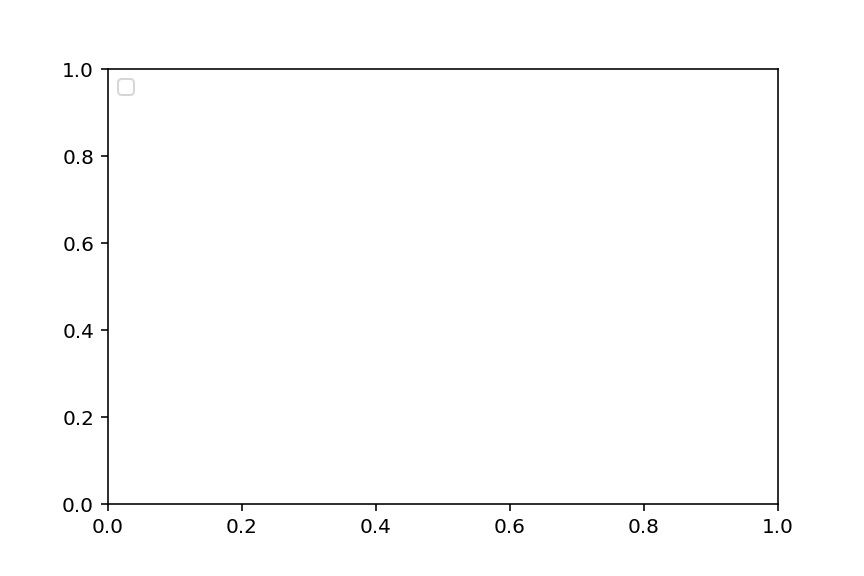

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


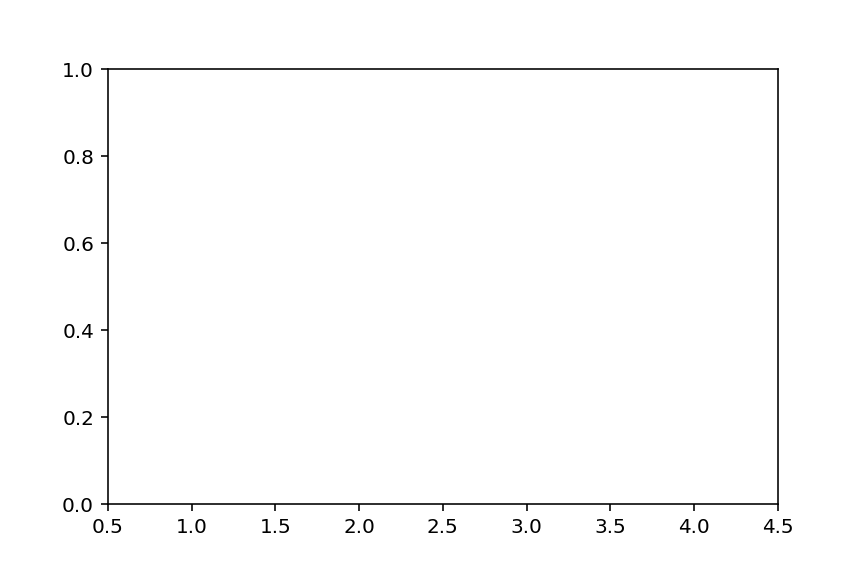

In [24]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [25]:
%matplotlib notebook

<IPython.core.display.Javascript object>


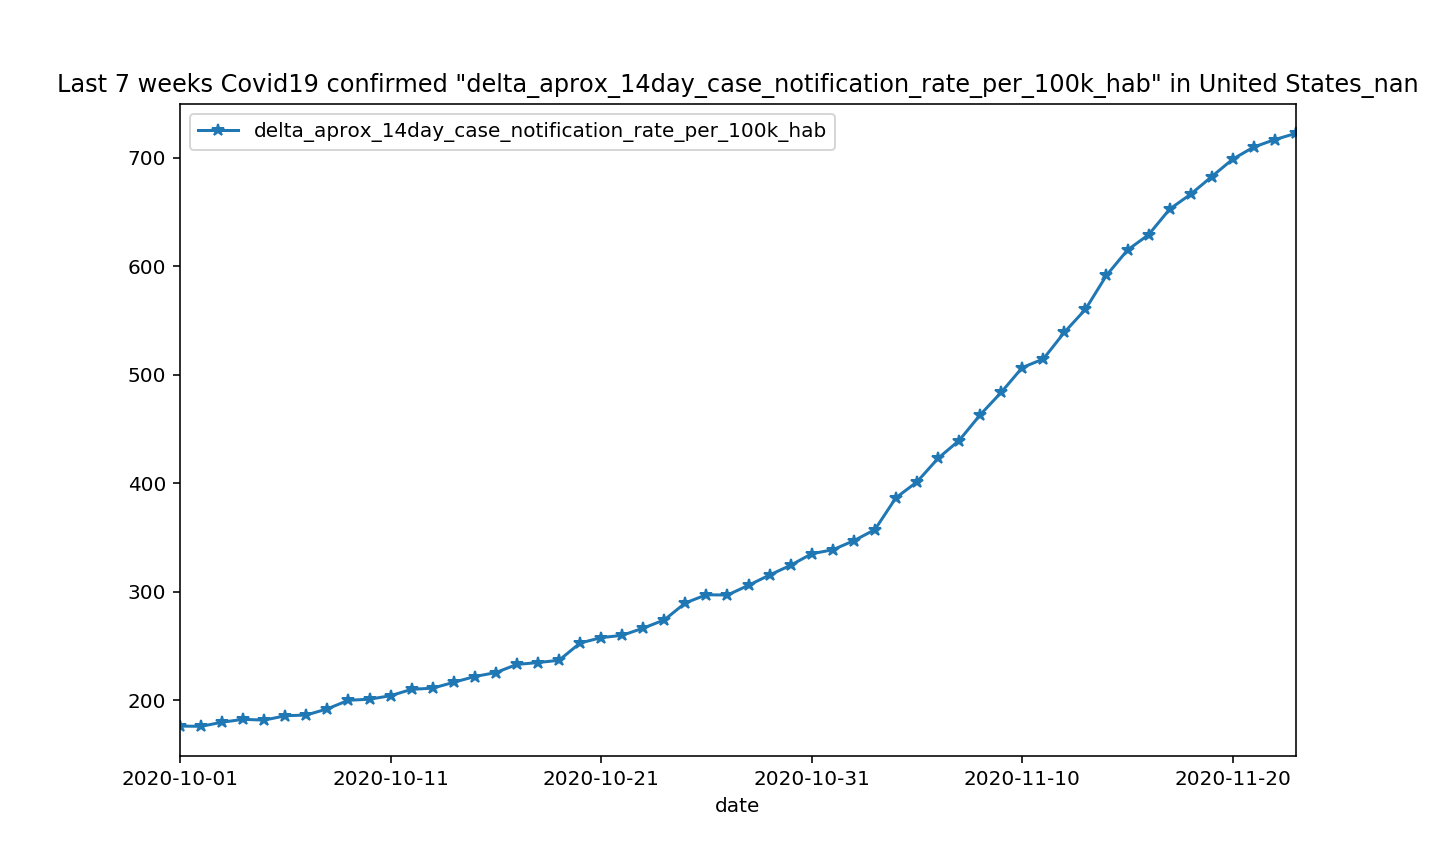

In [26]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


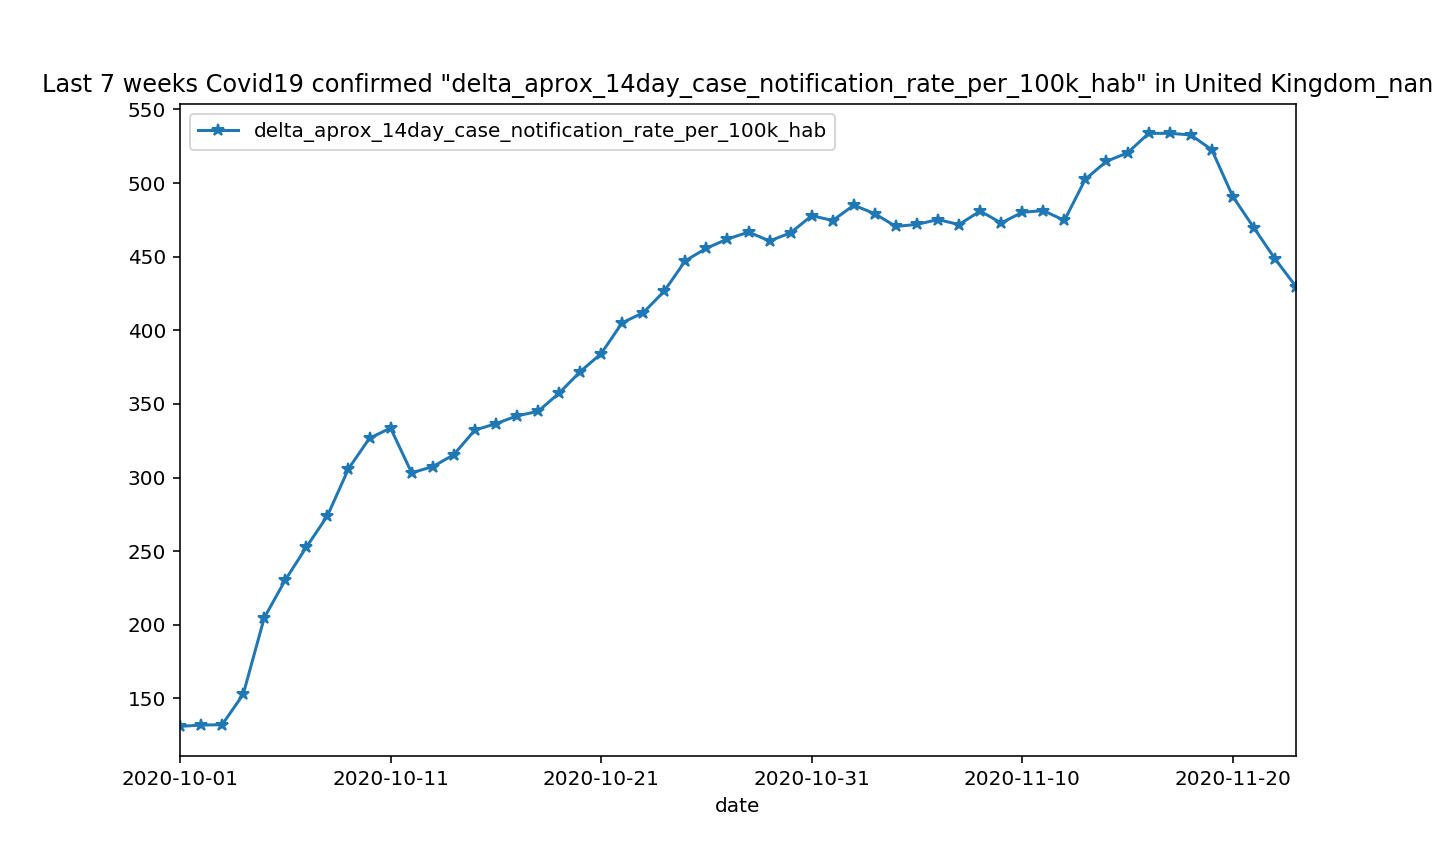

In [27]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


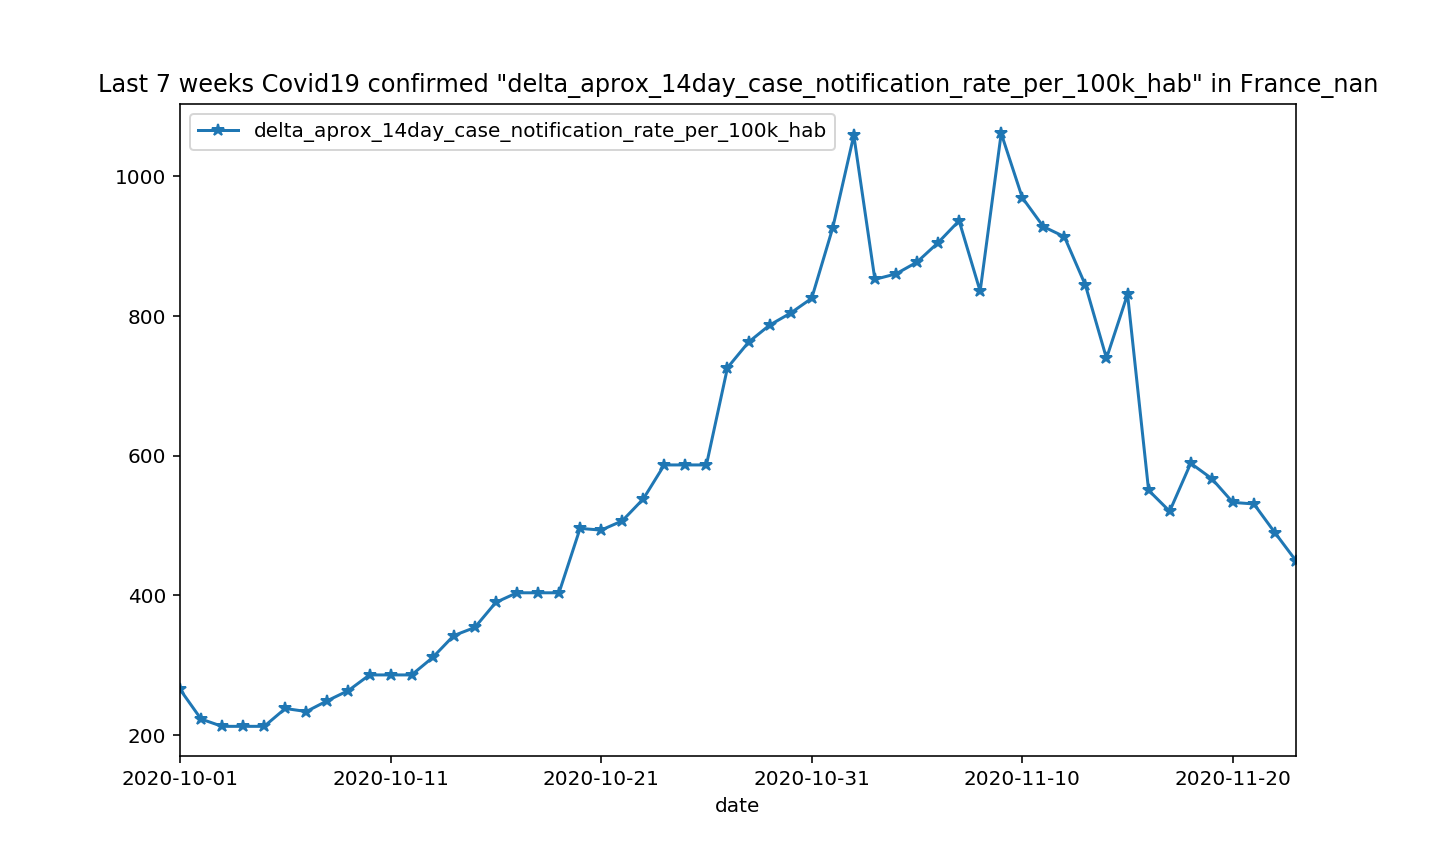

In [28]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


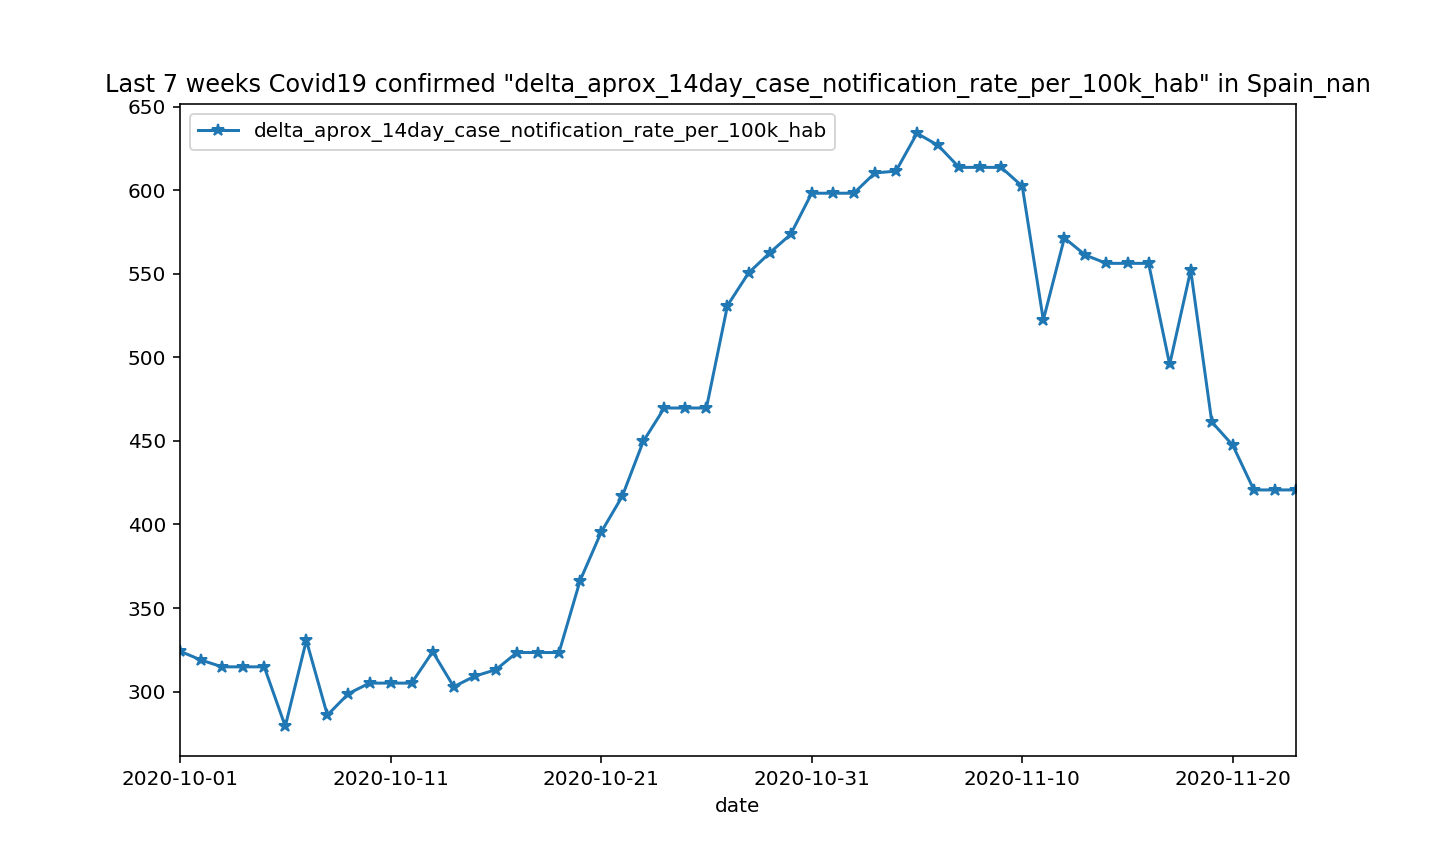

In [29]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


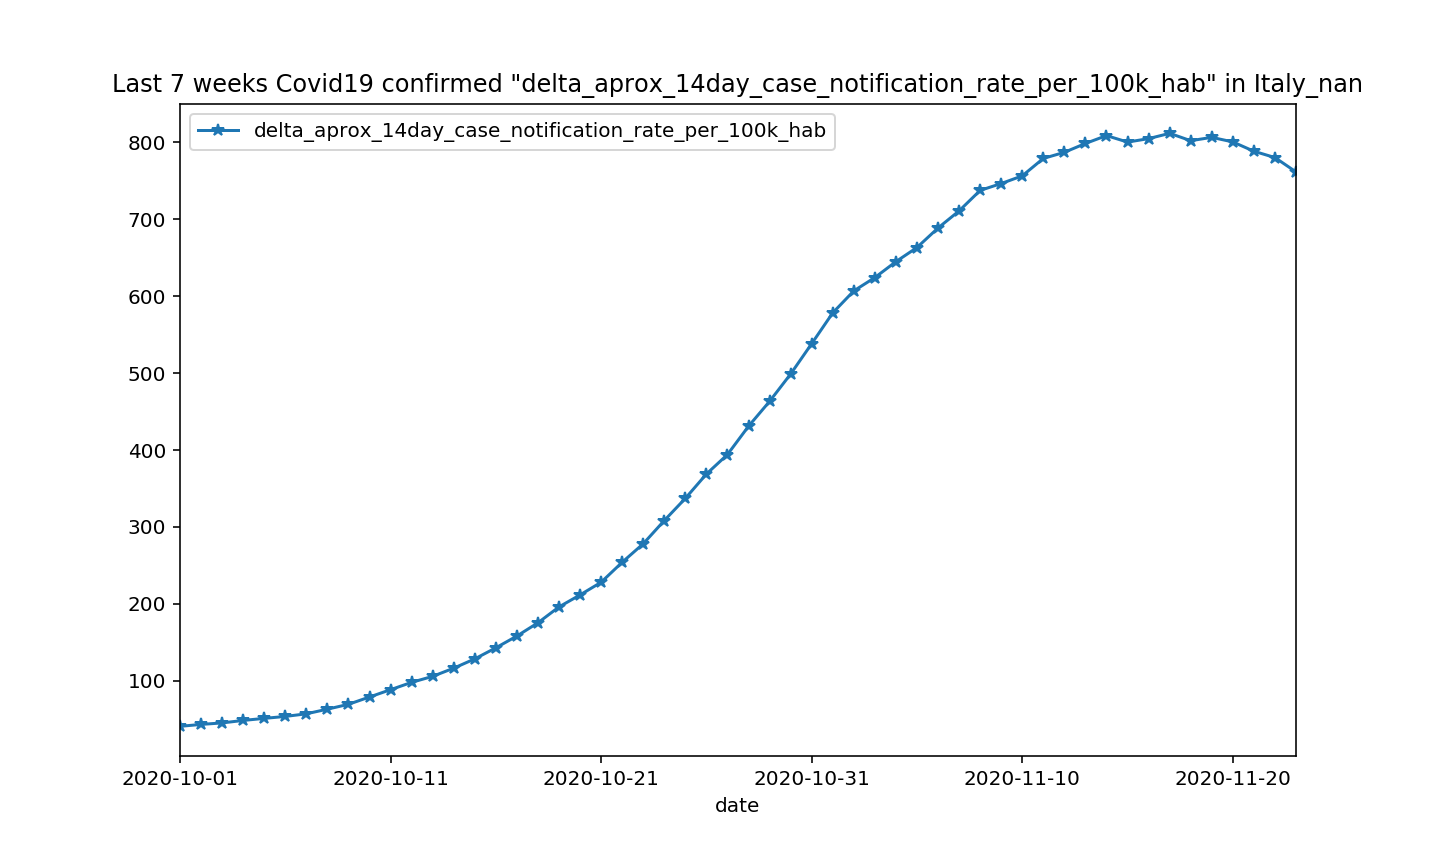

In [30]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


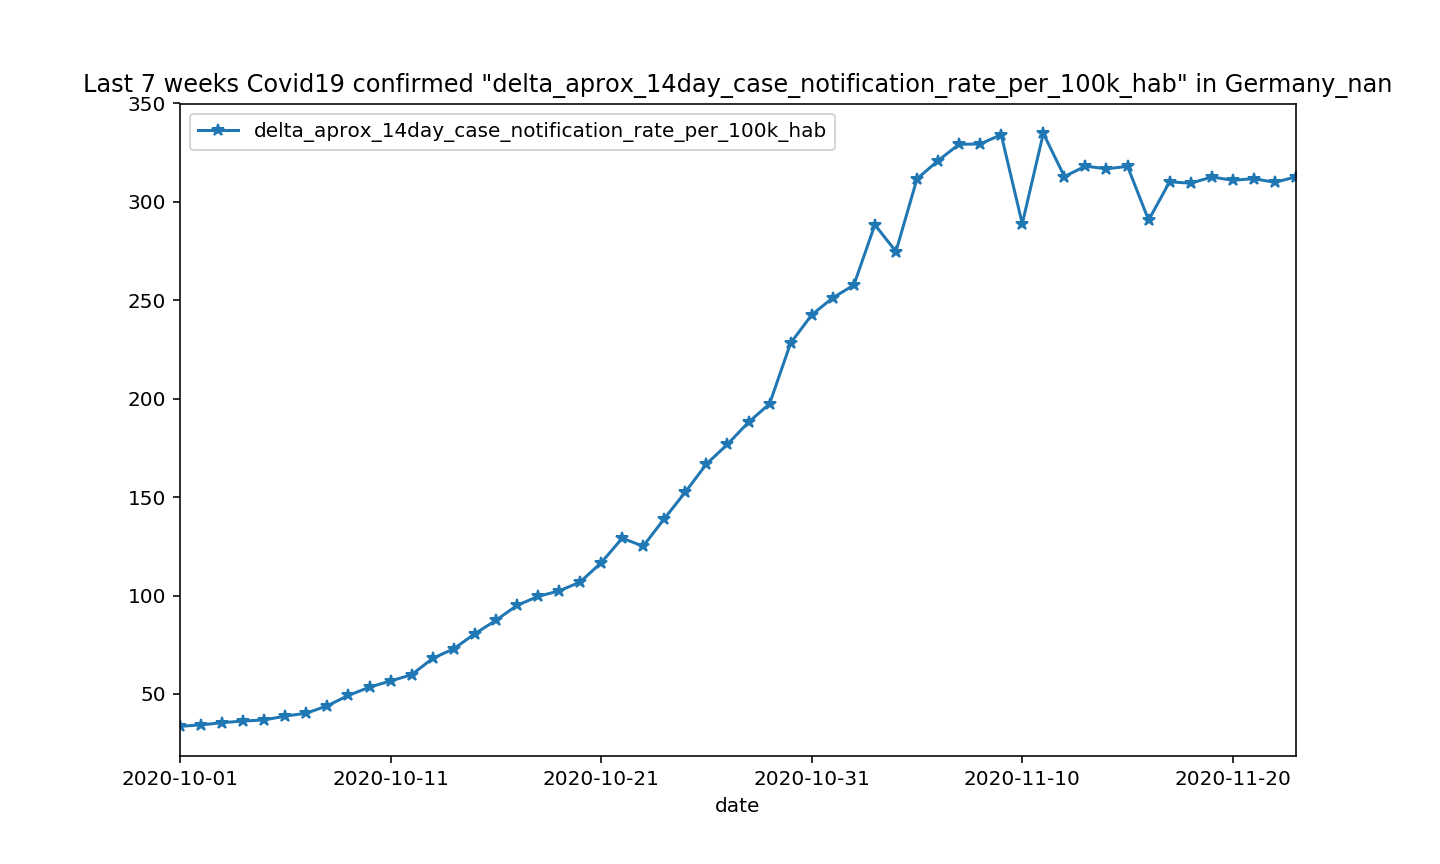

In [31]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


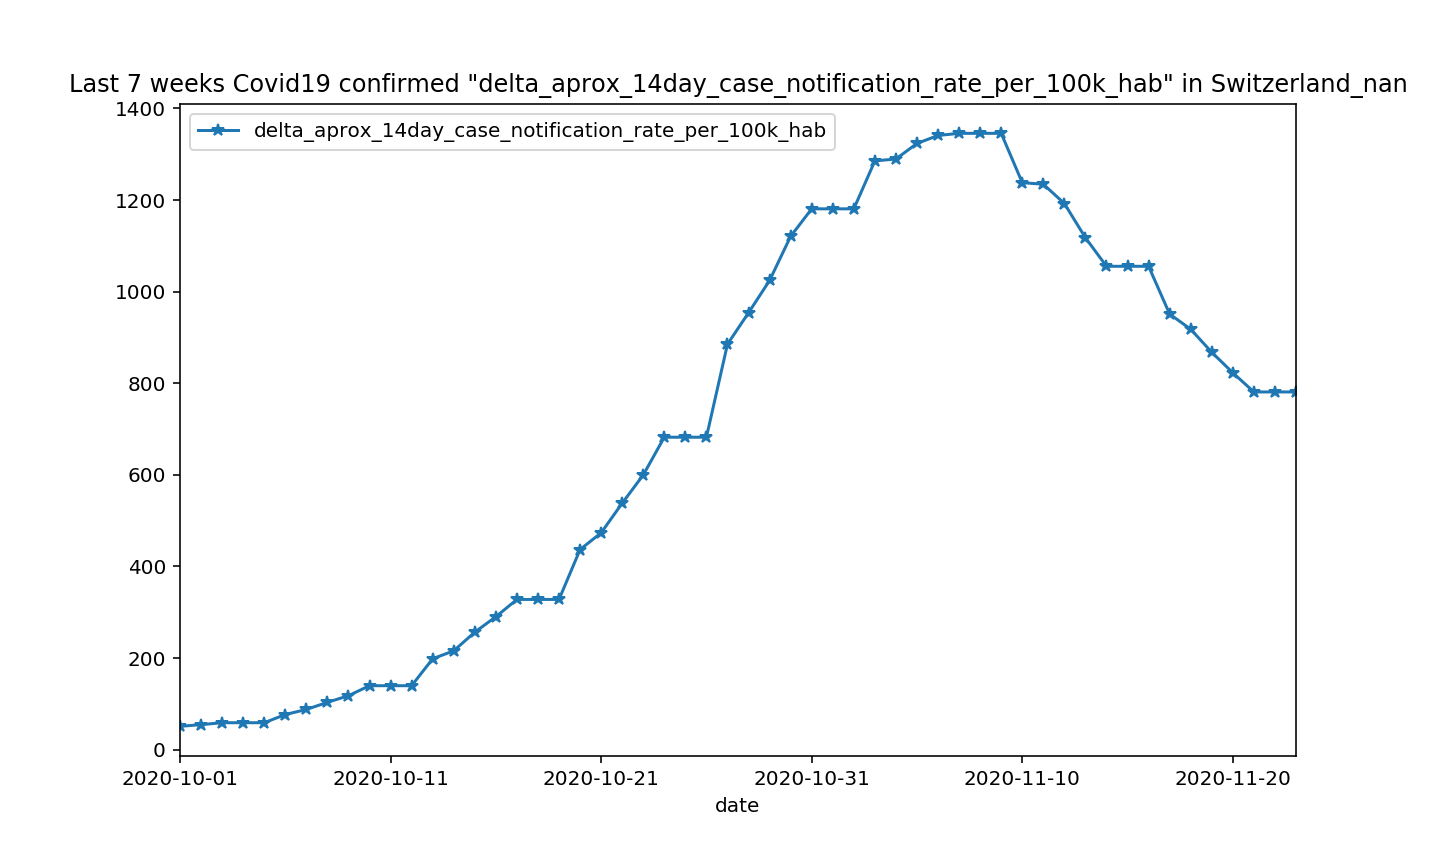

In [32]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


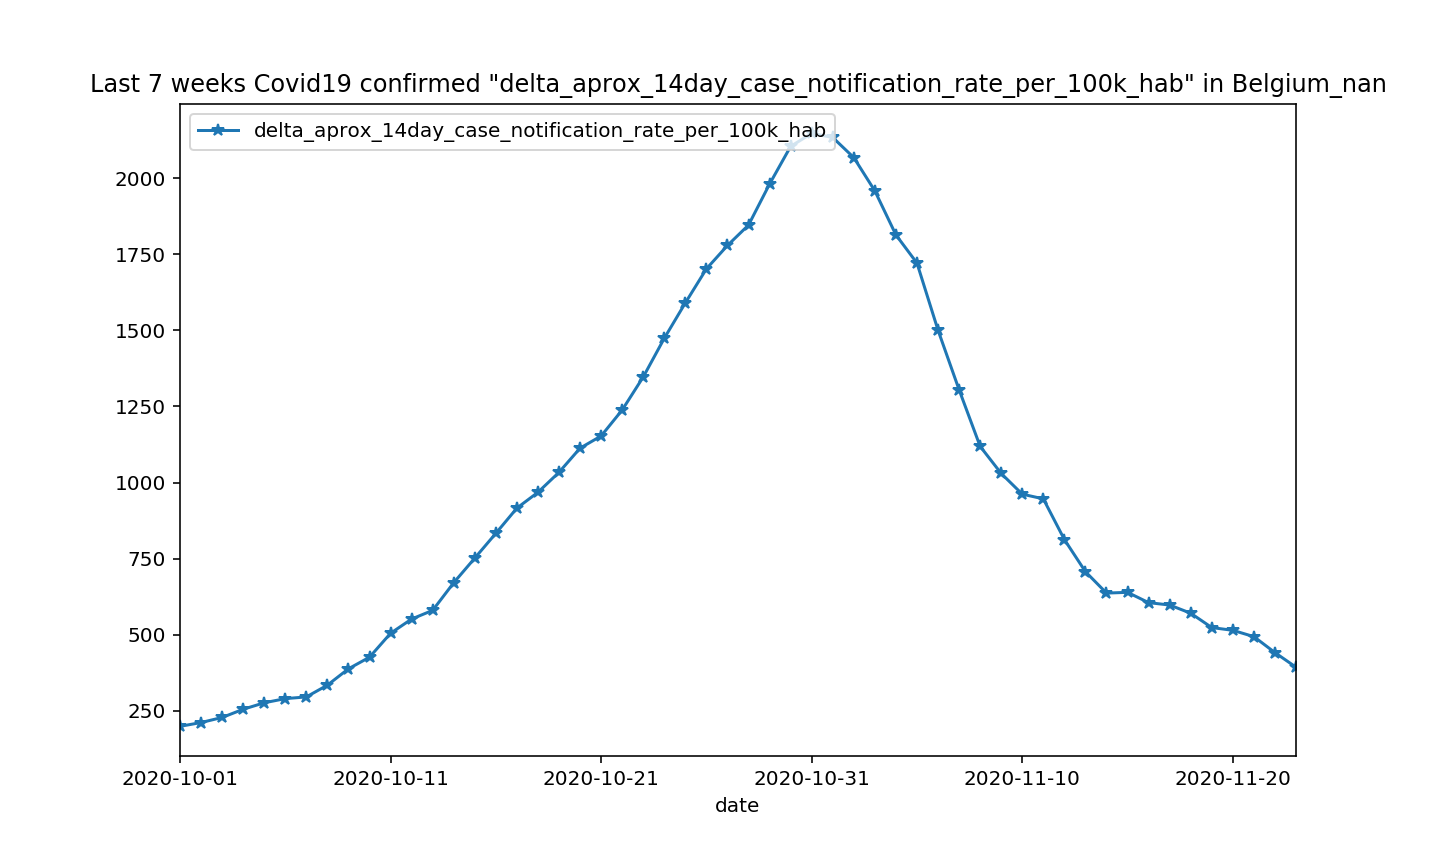

In [33]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


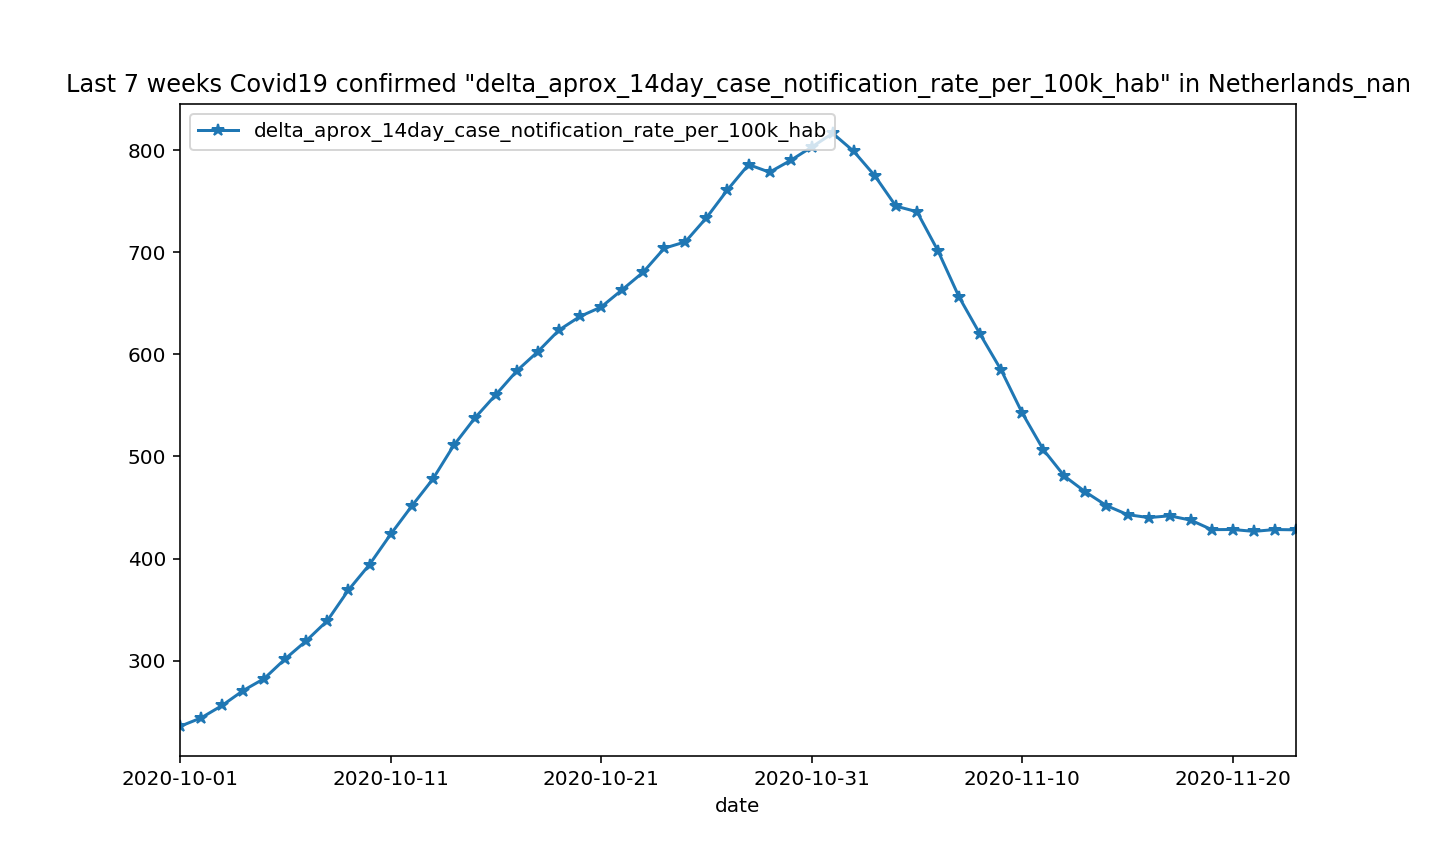

In [34]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


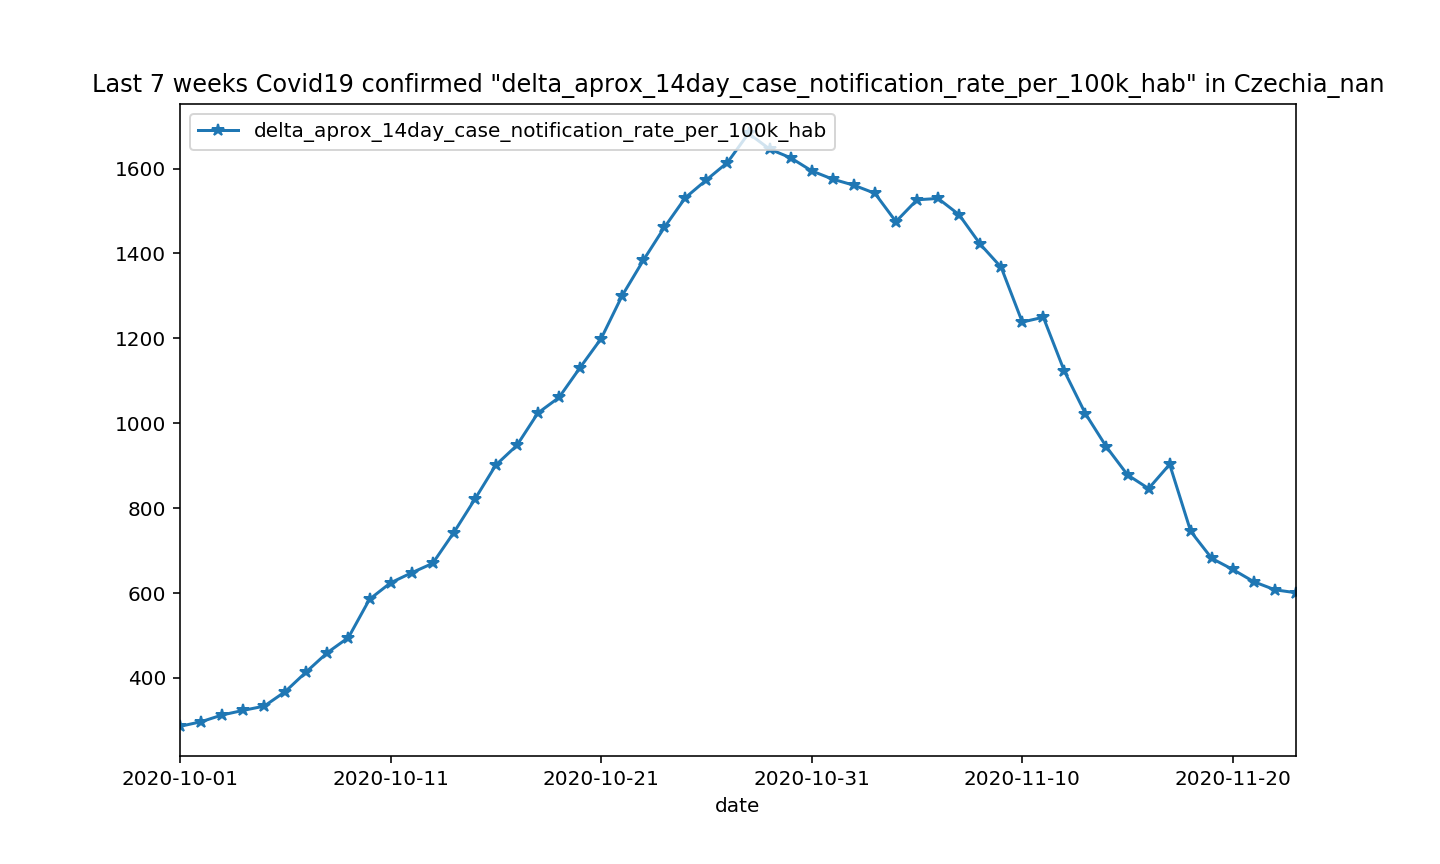

In [35]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


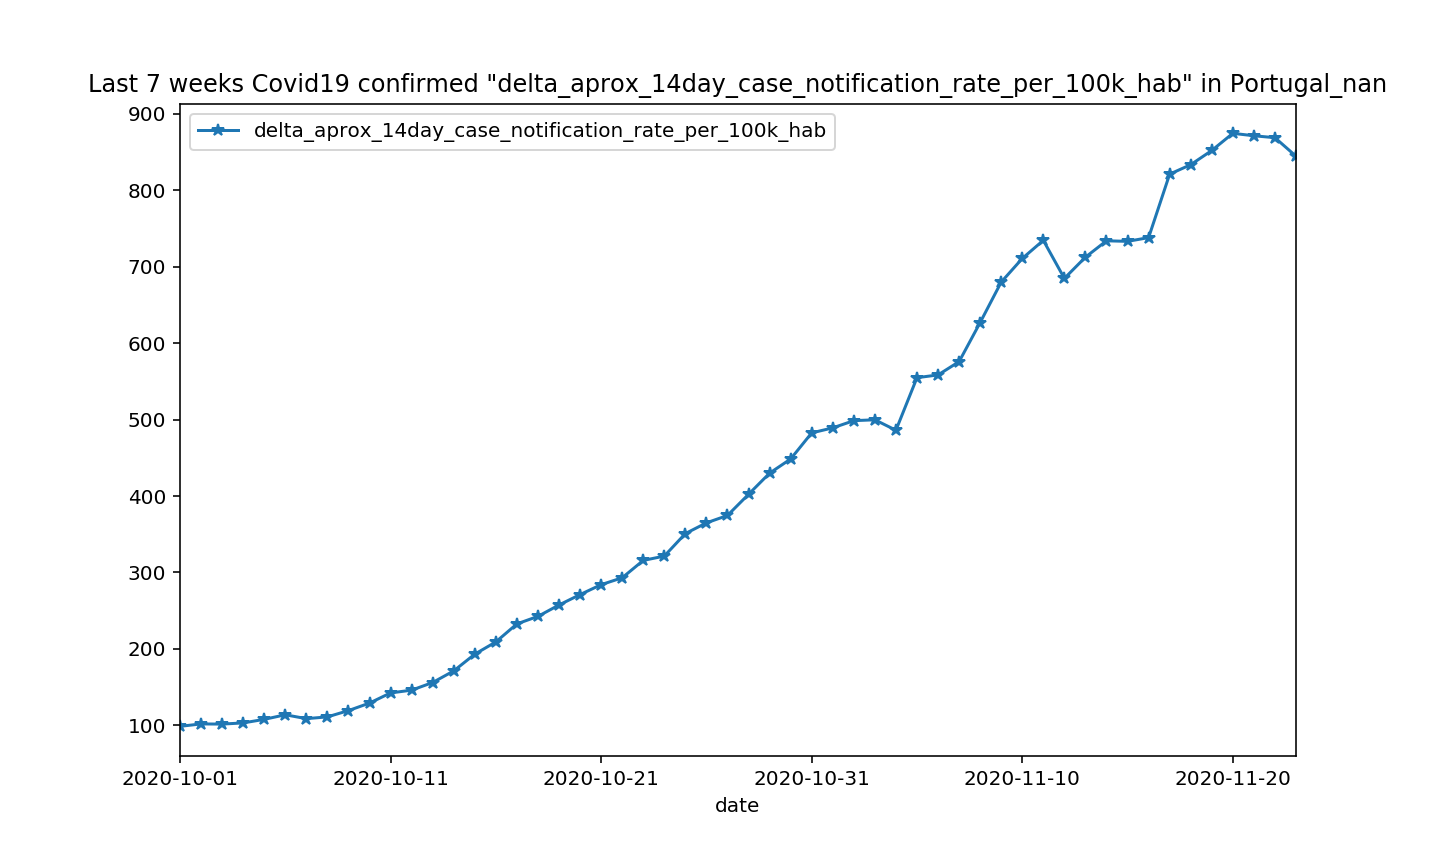

In [36]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [37]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


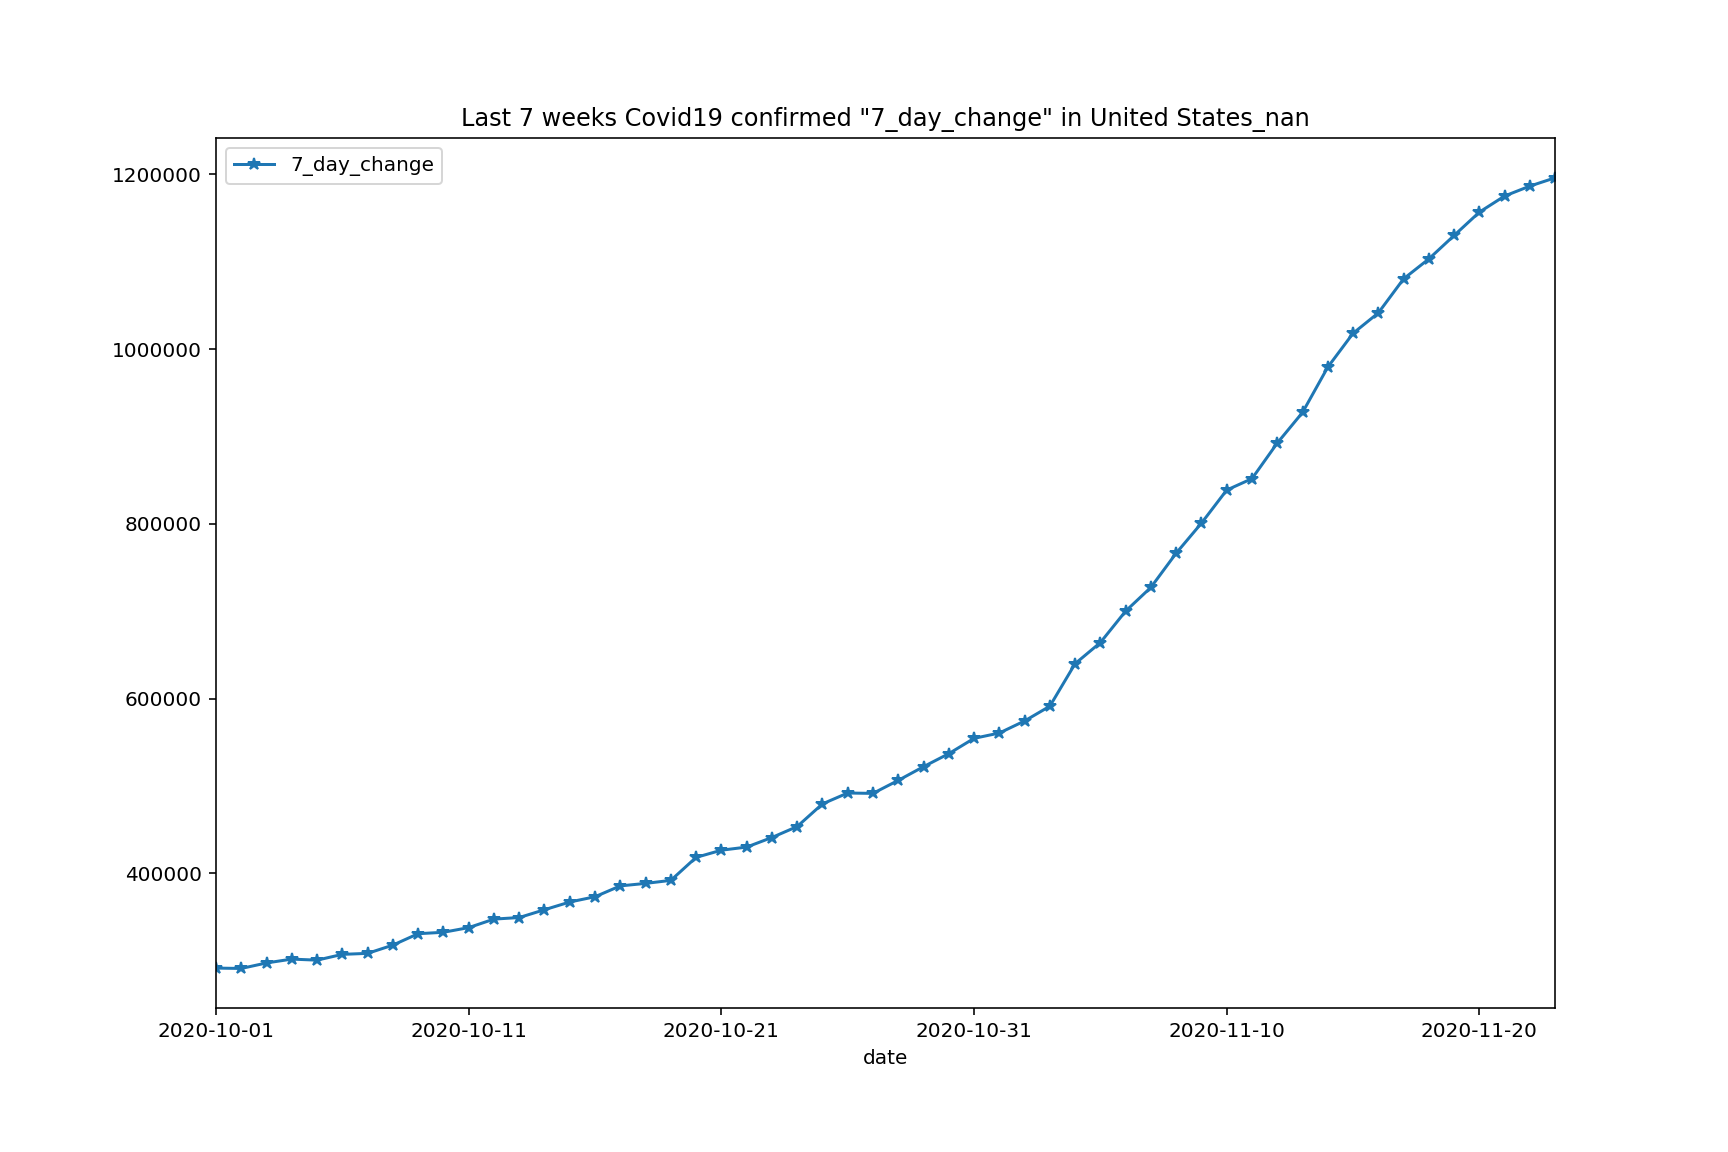

In [38]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


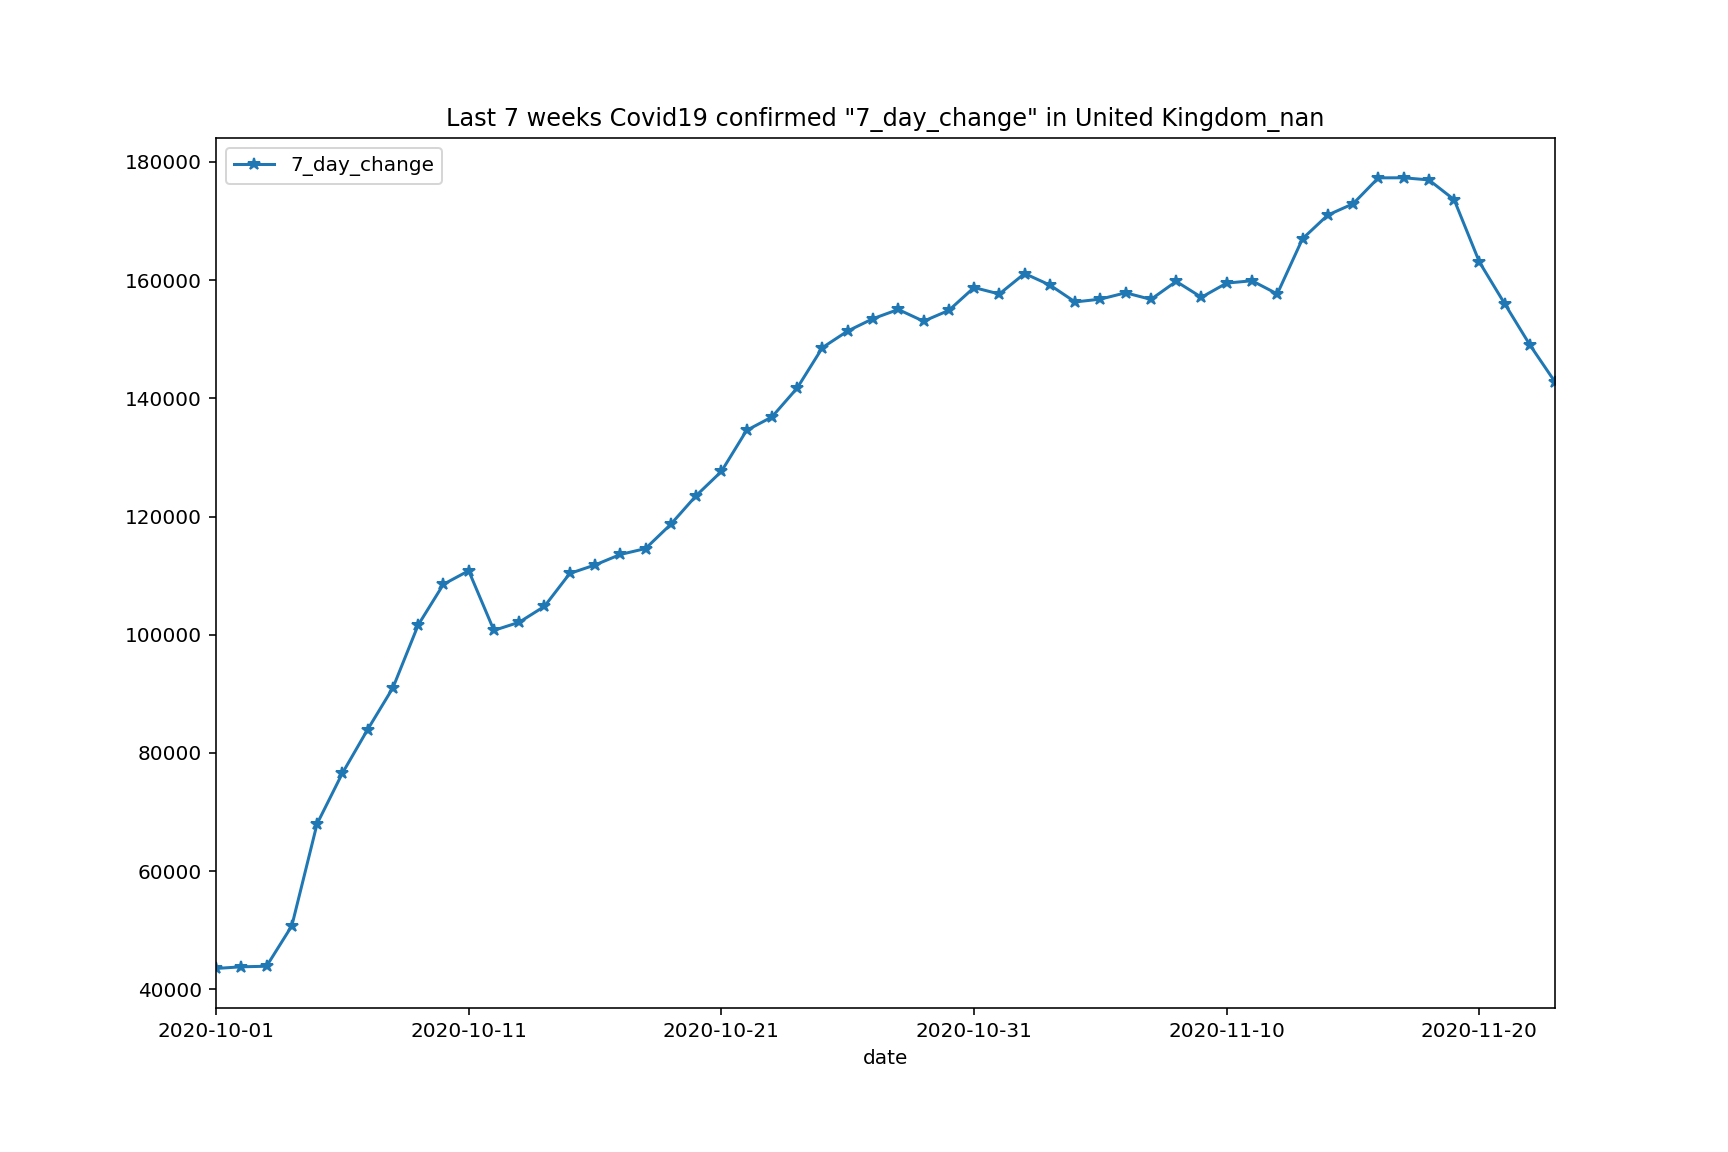

In [39]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


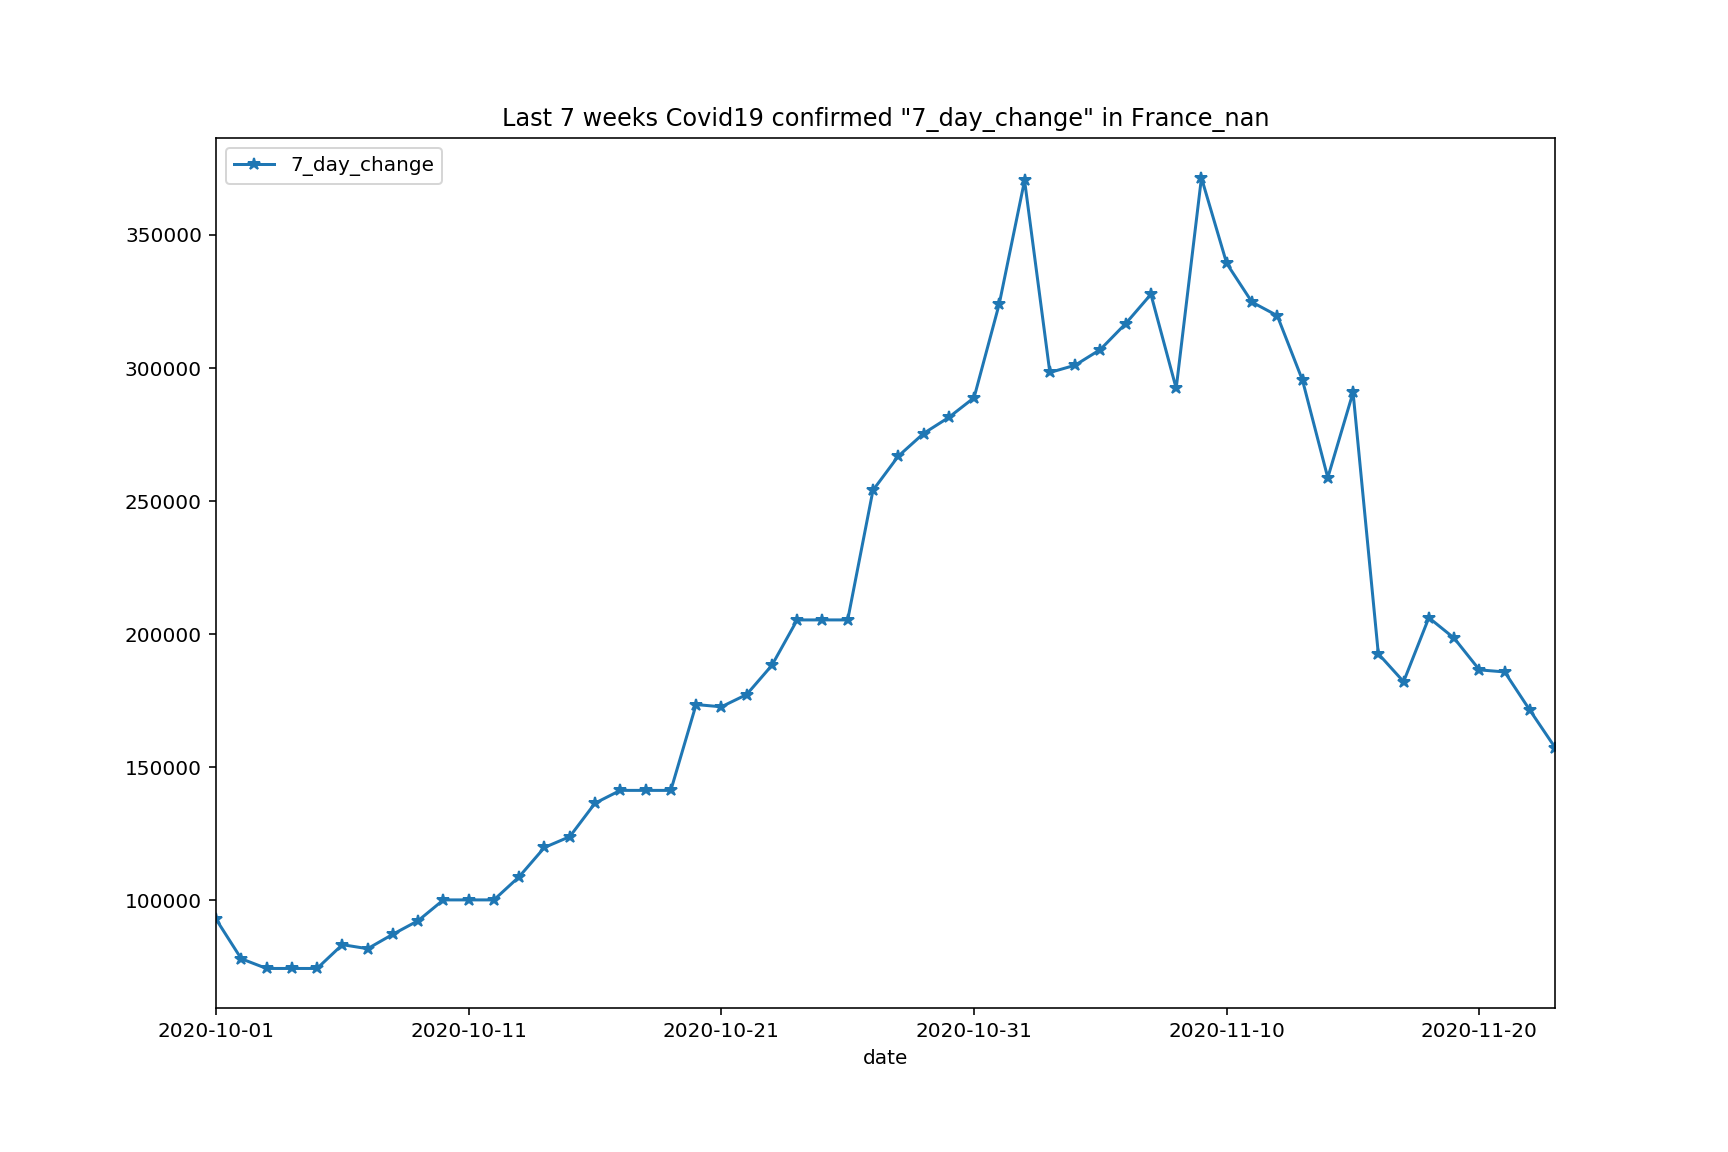

In [40]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


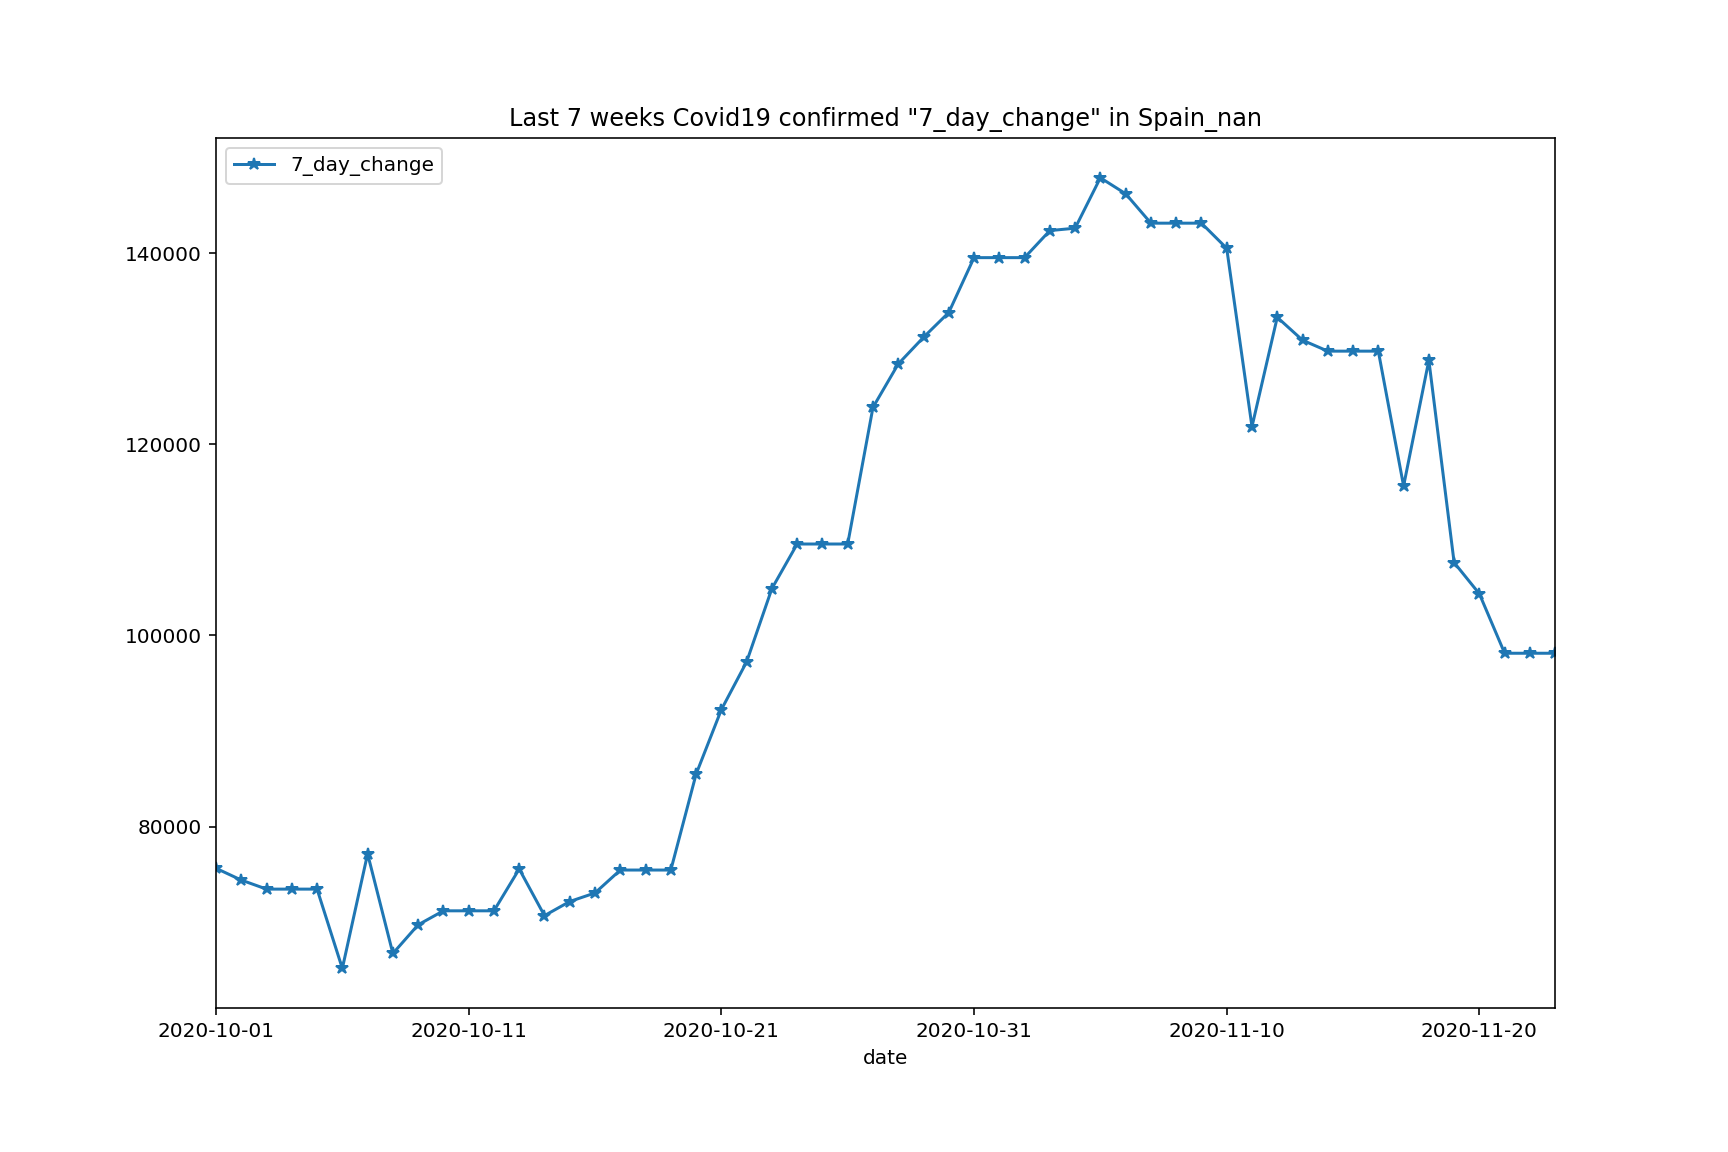

In [41]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


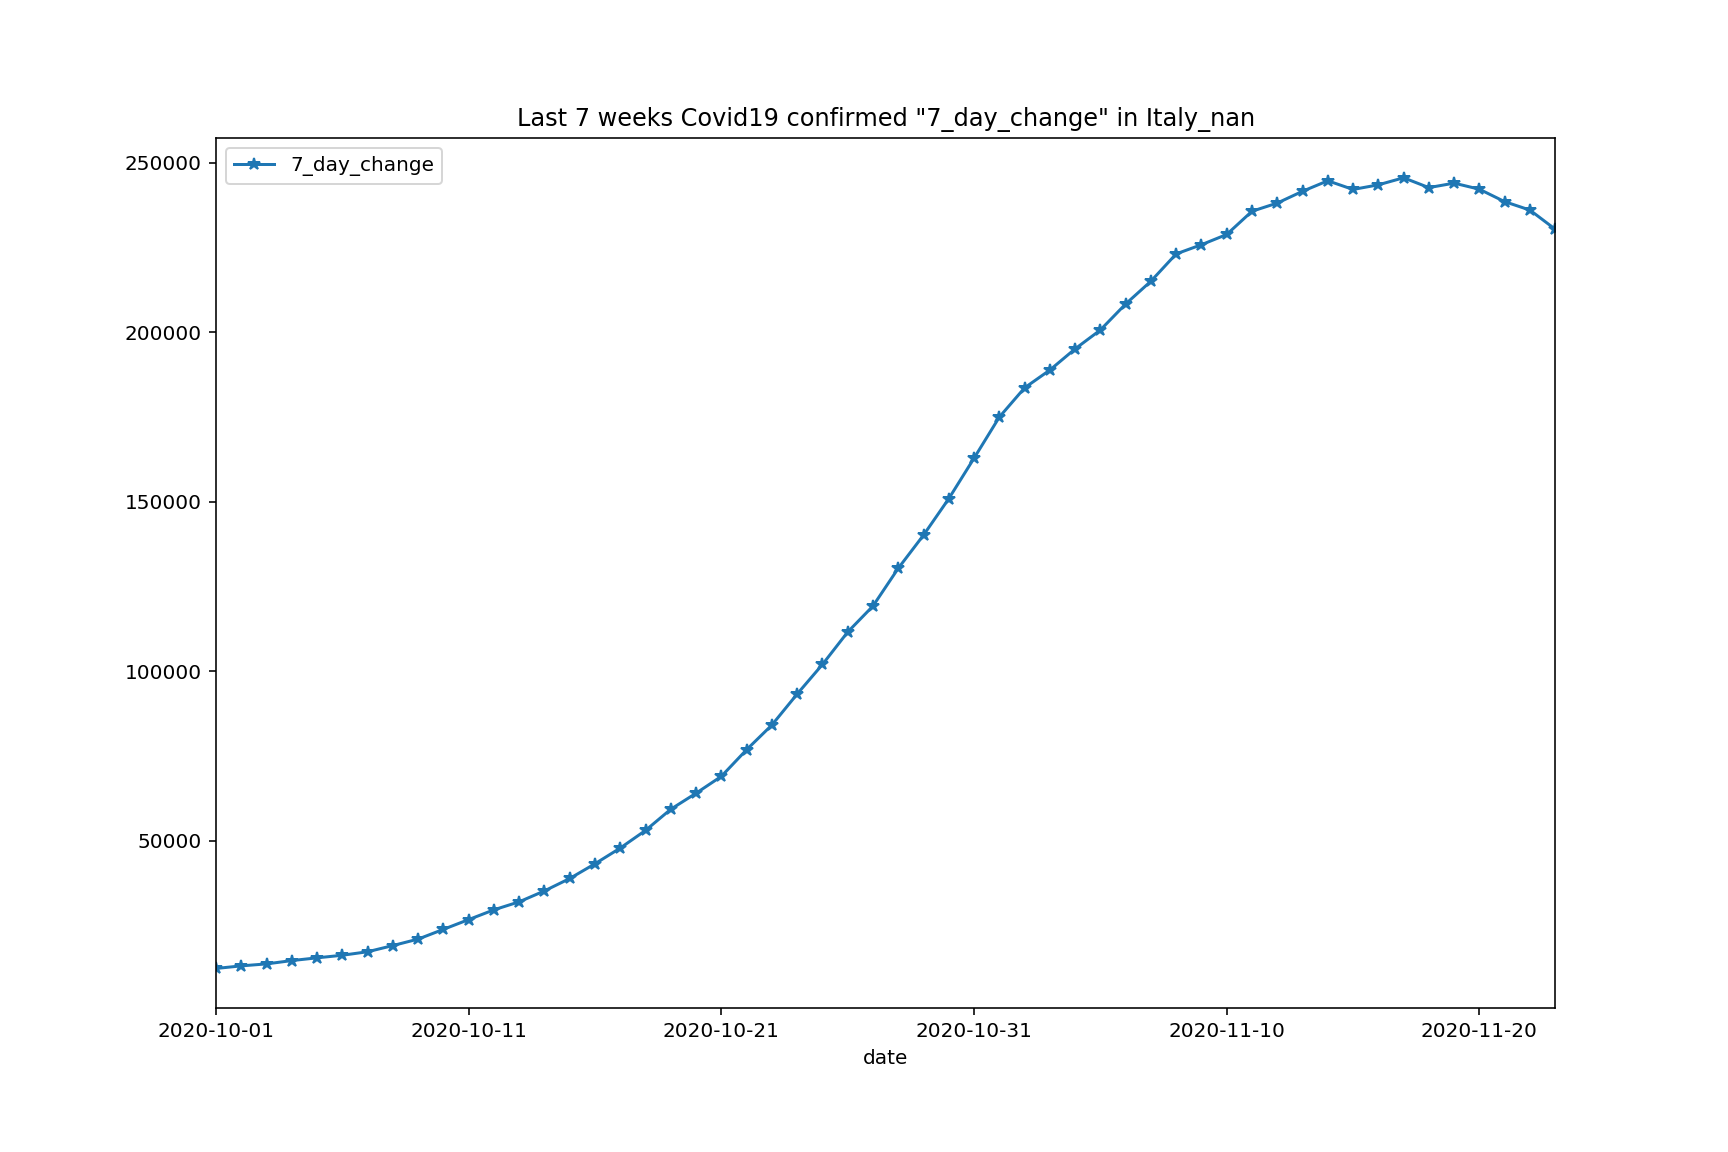

In [42]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


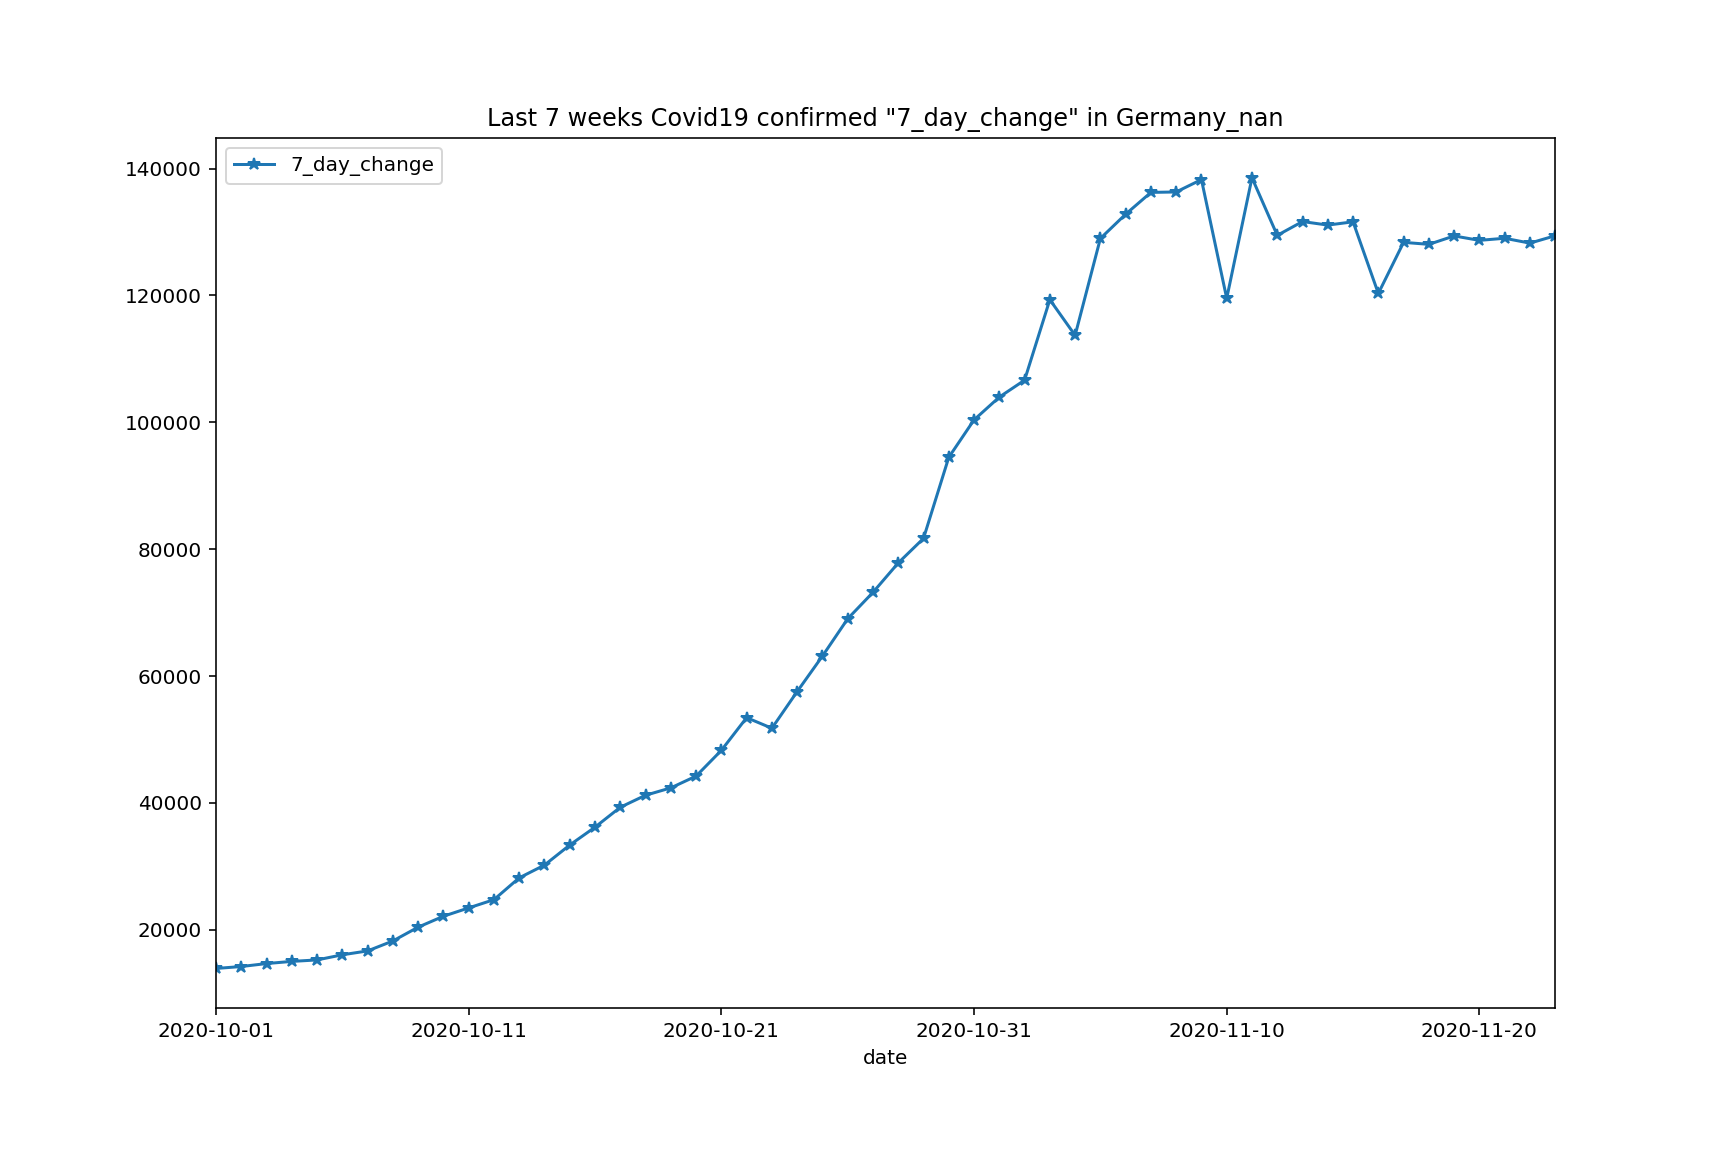

In [43]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


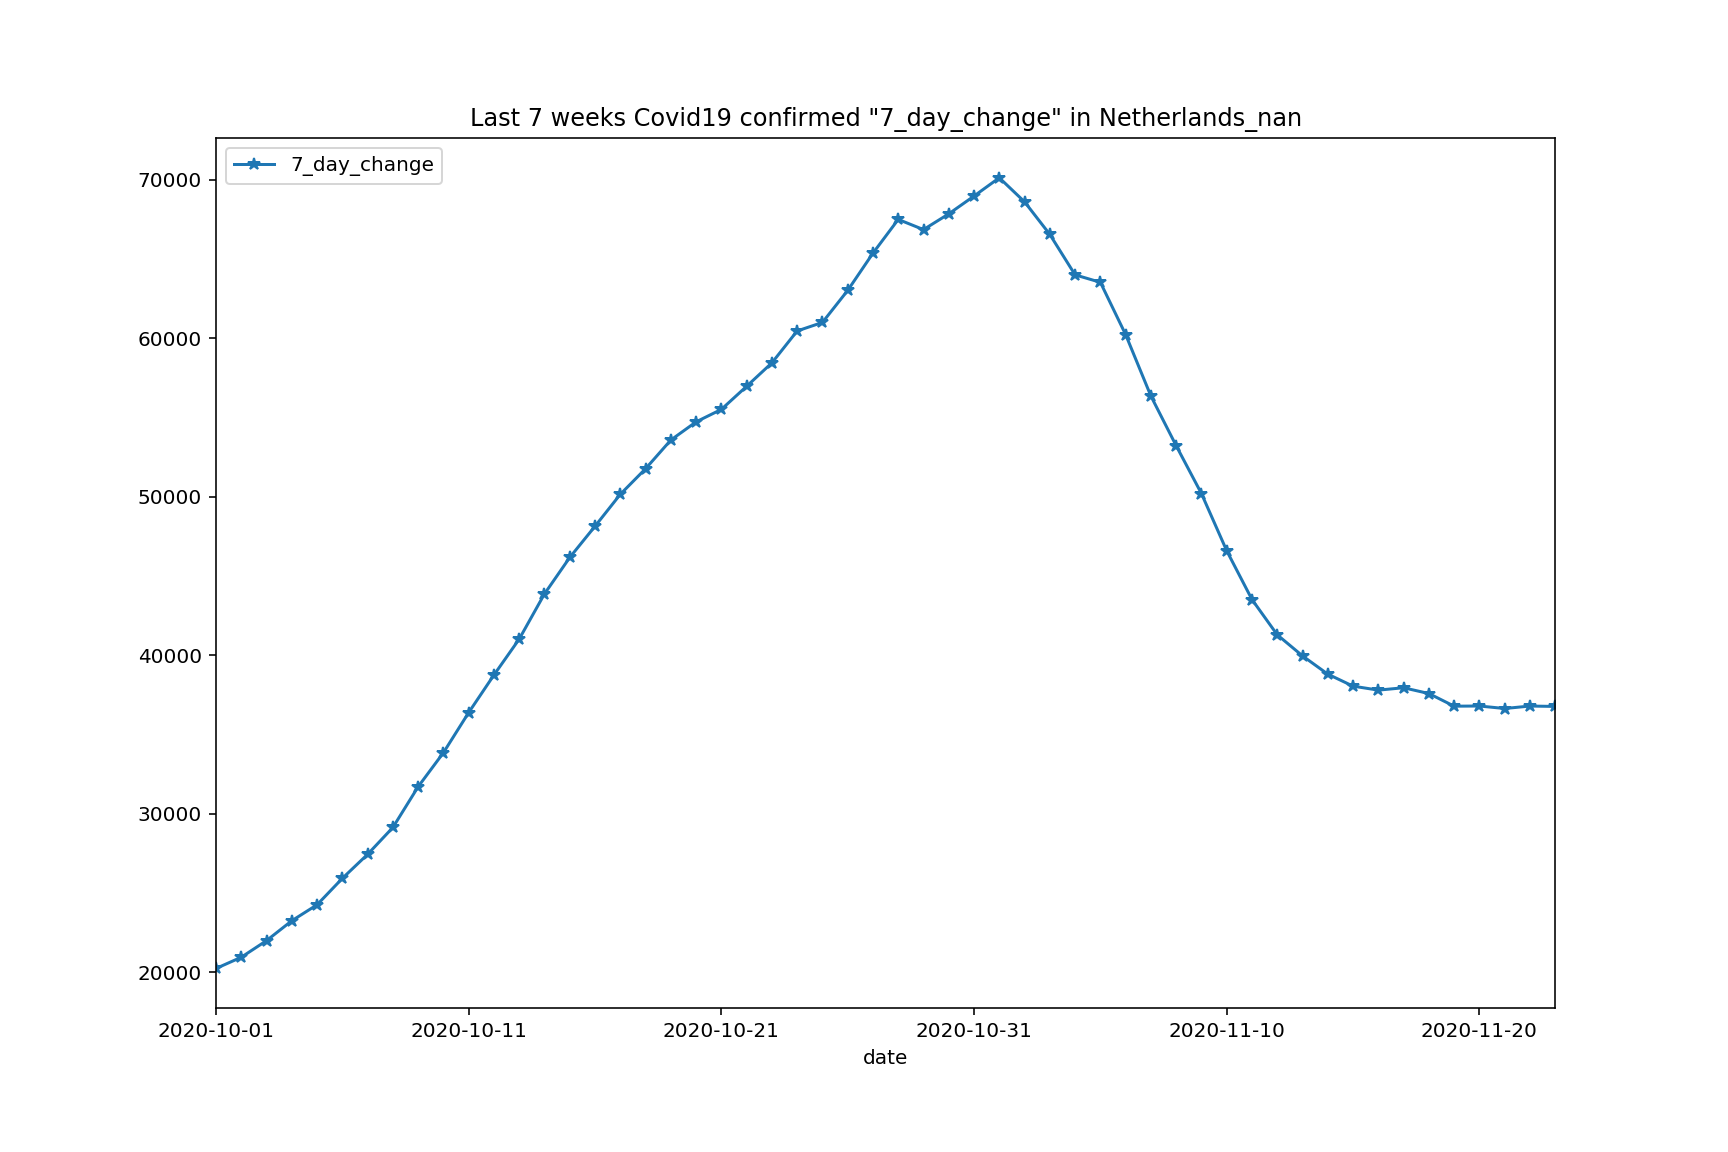

In [44]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


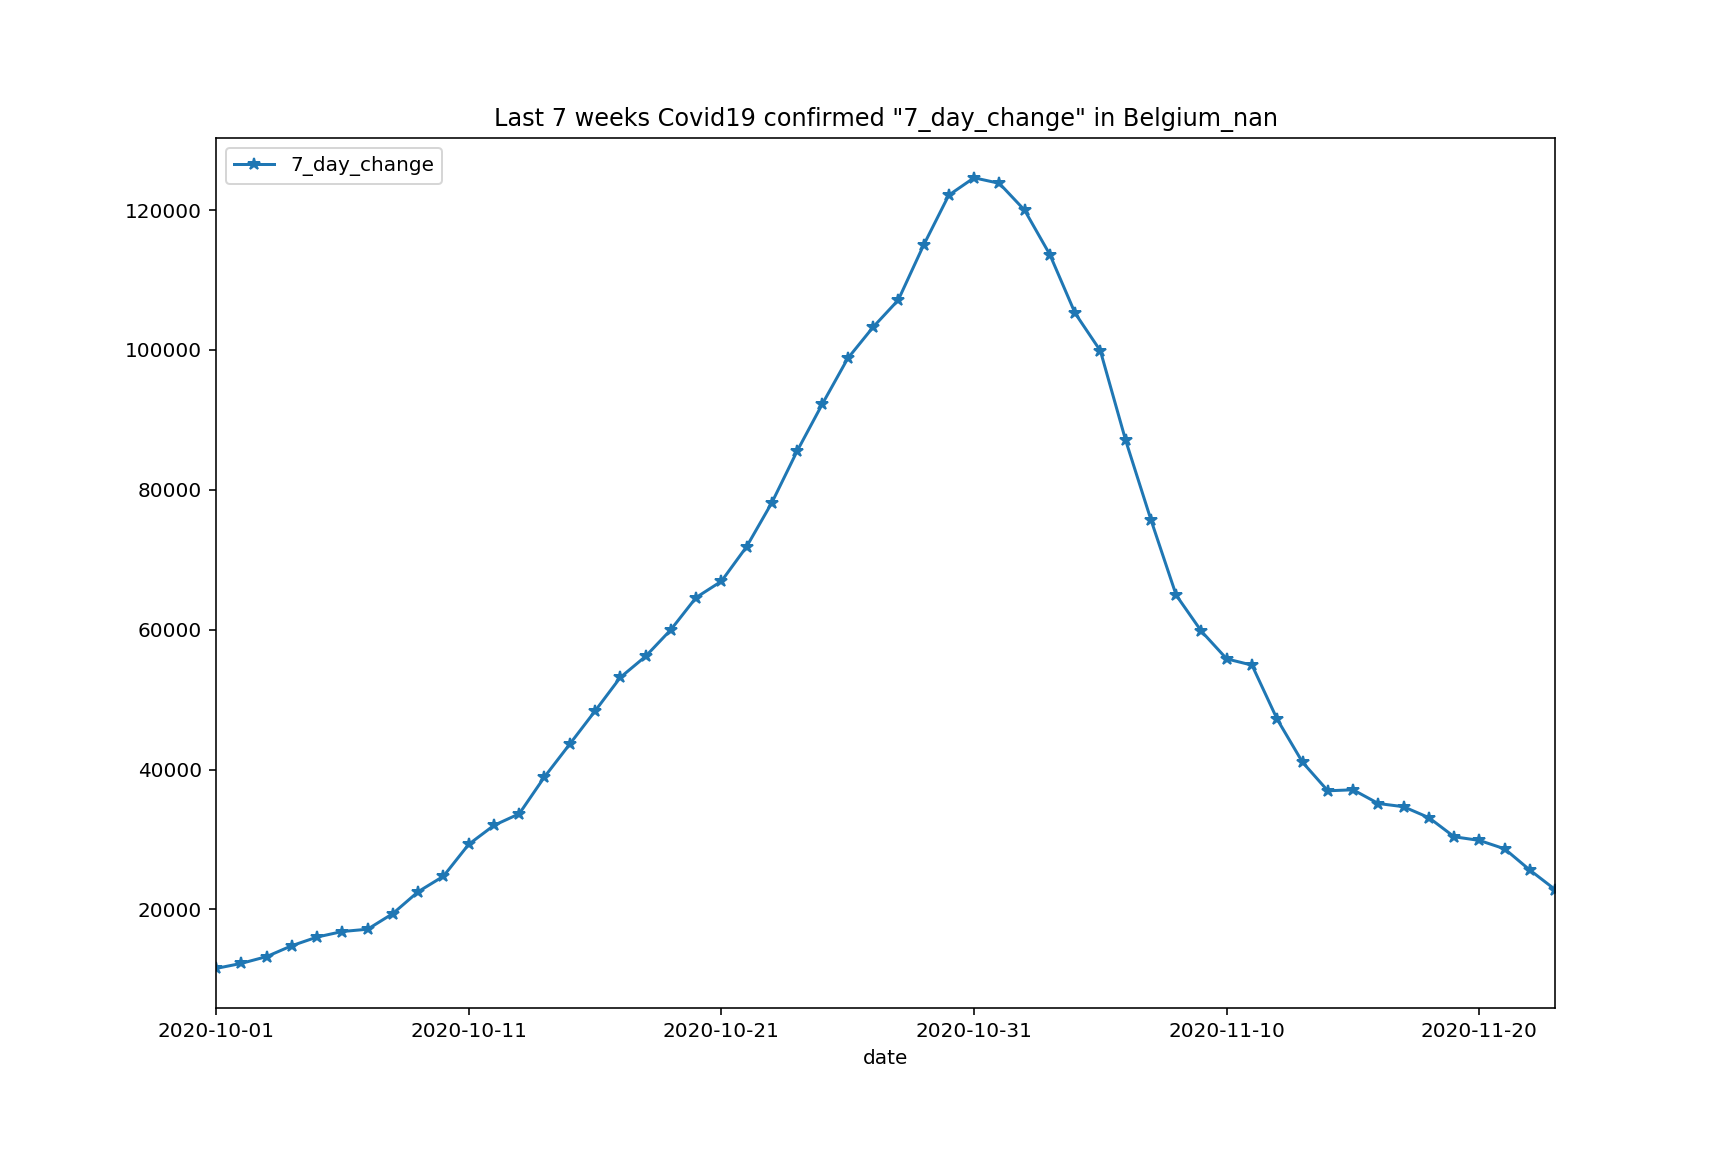

In [45]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


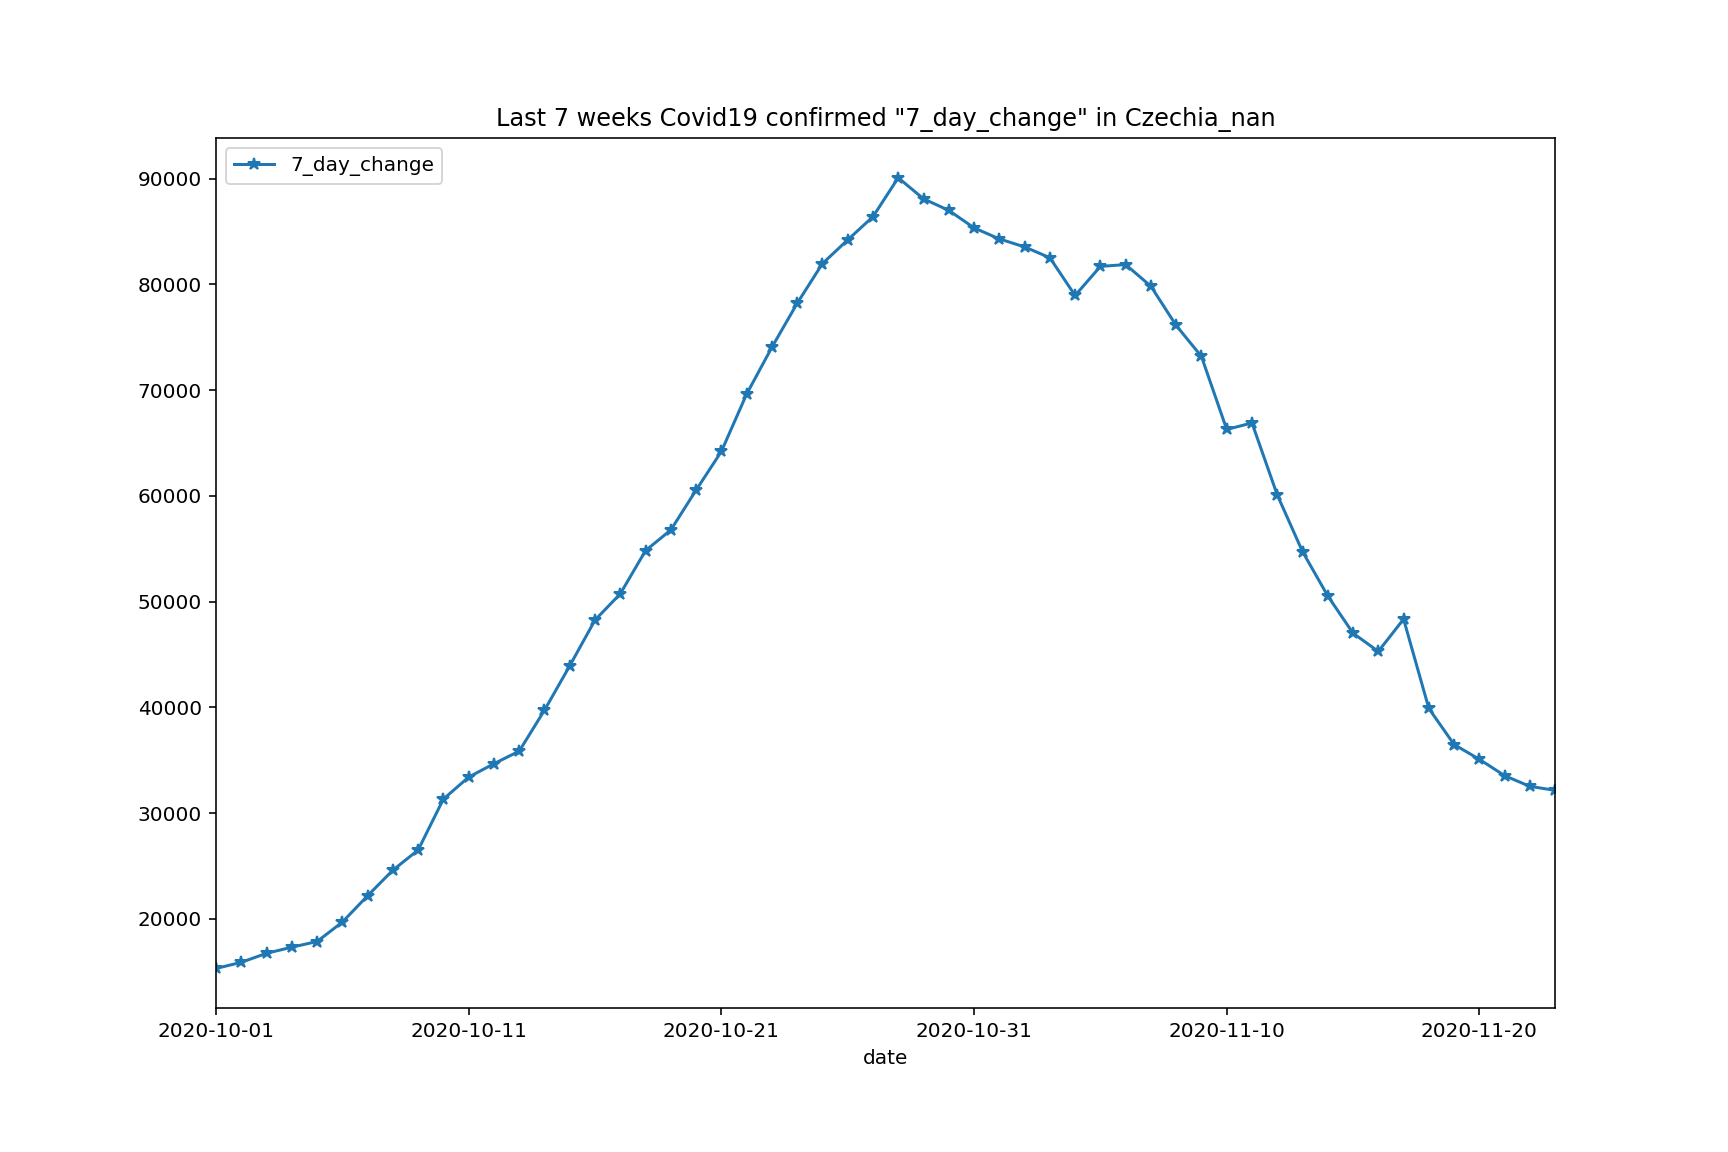

In [46]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


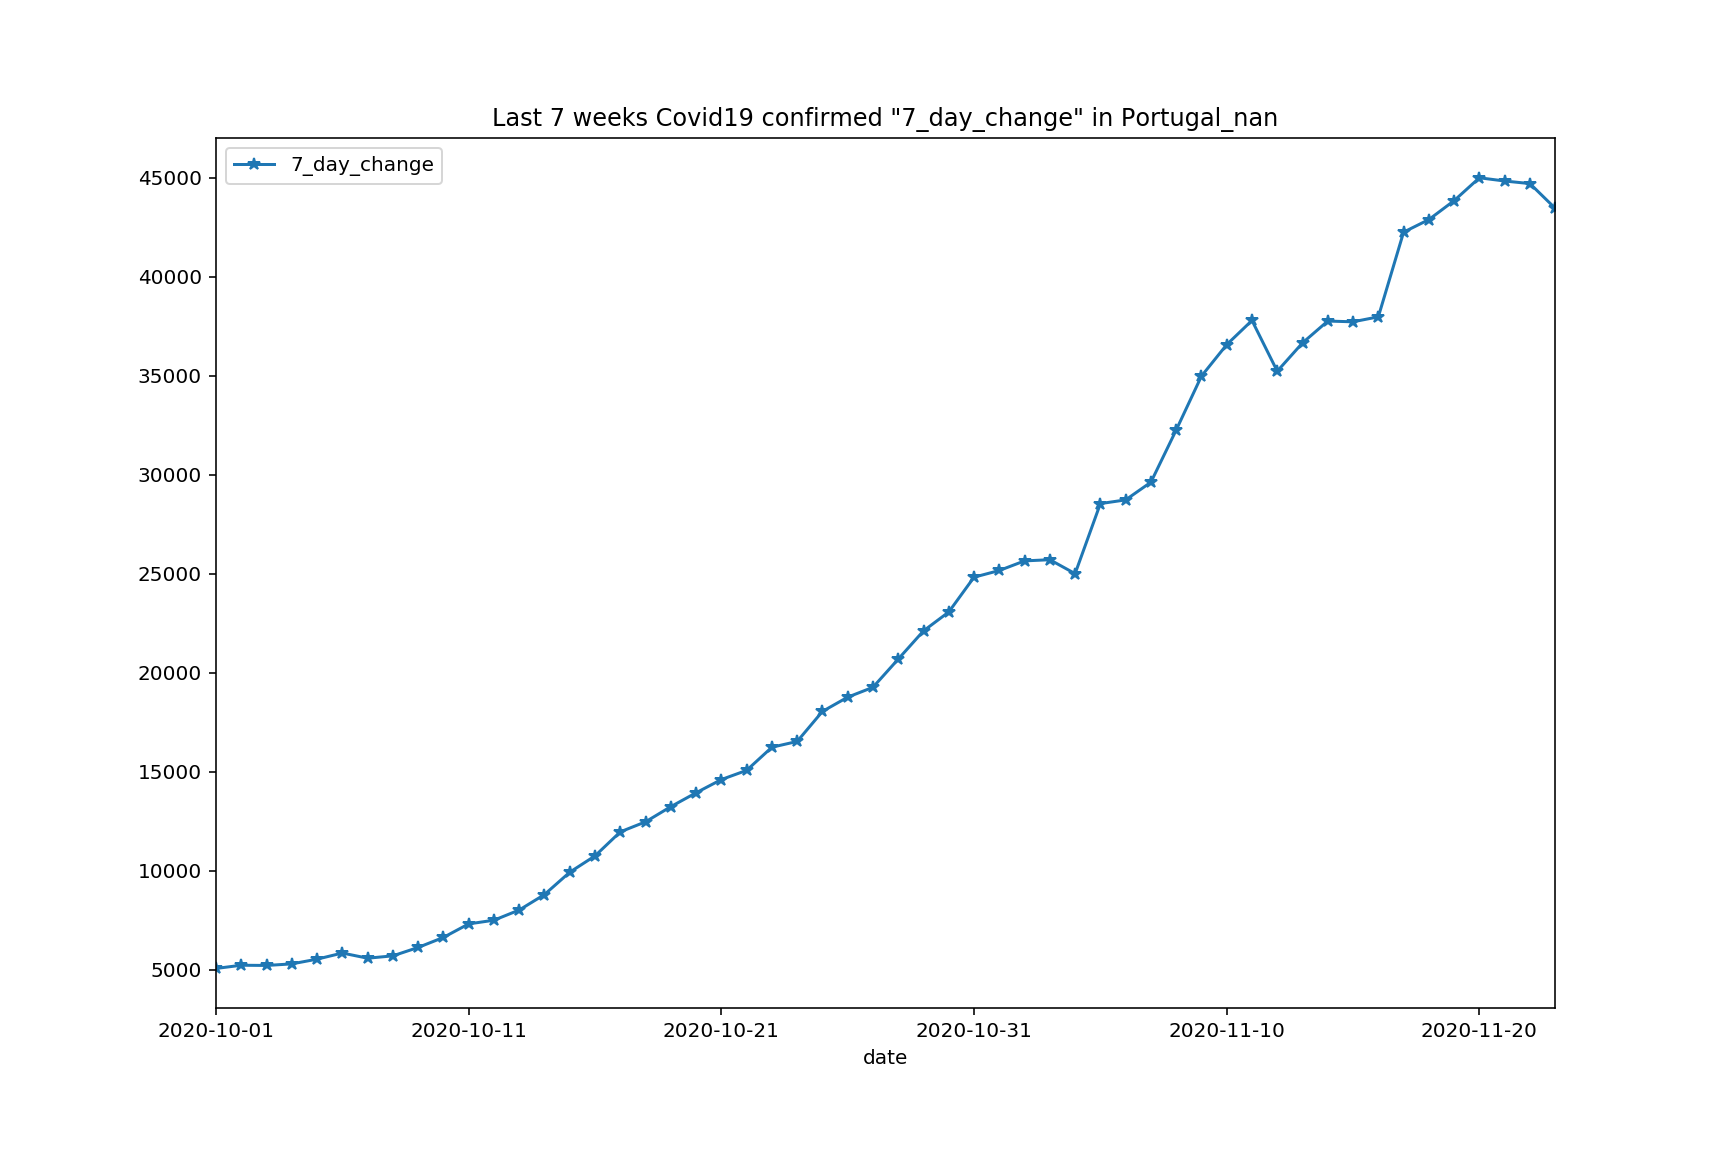

In [47]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [48]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


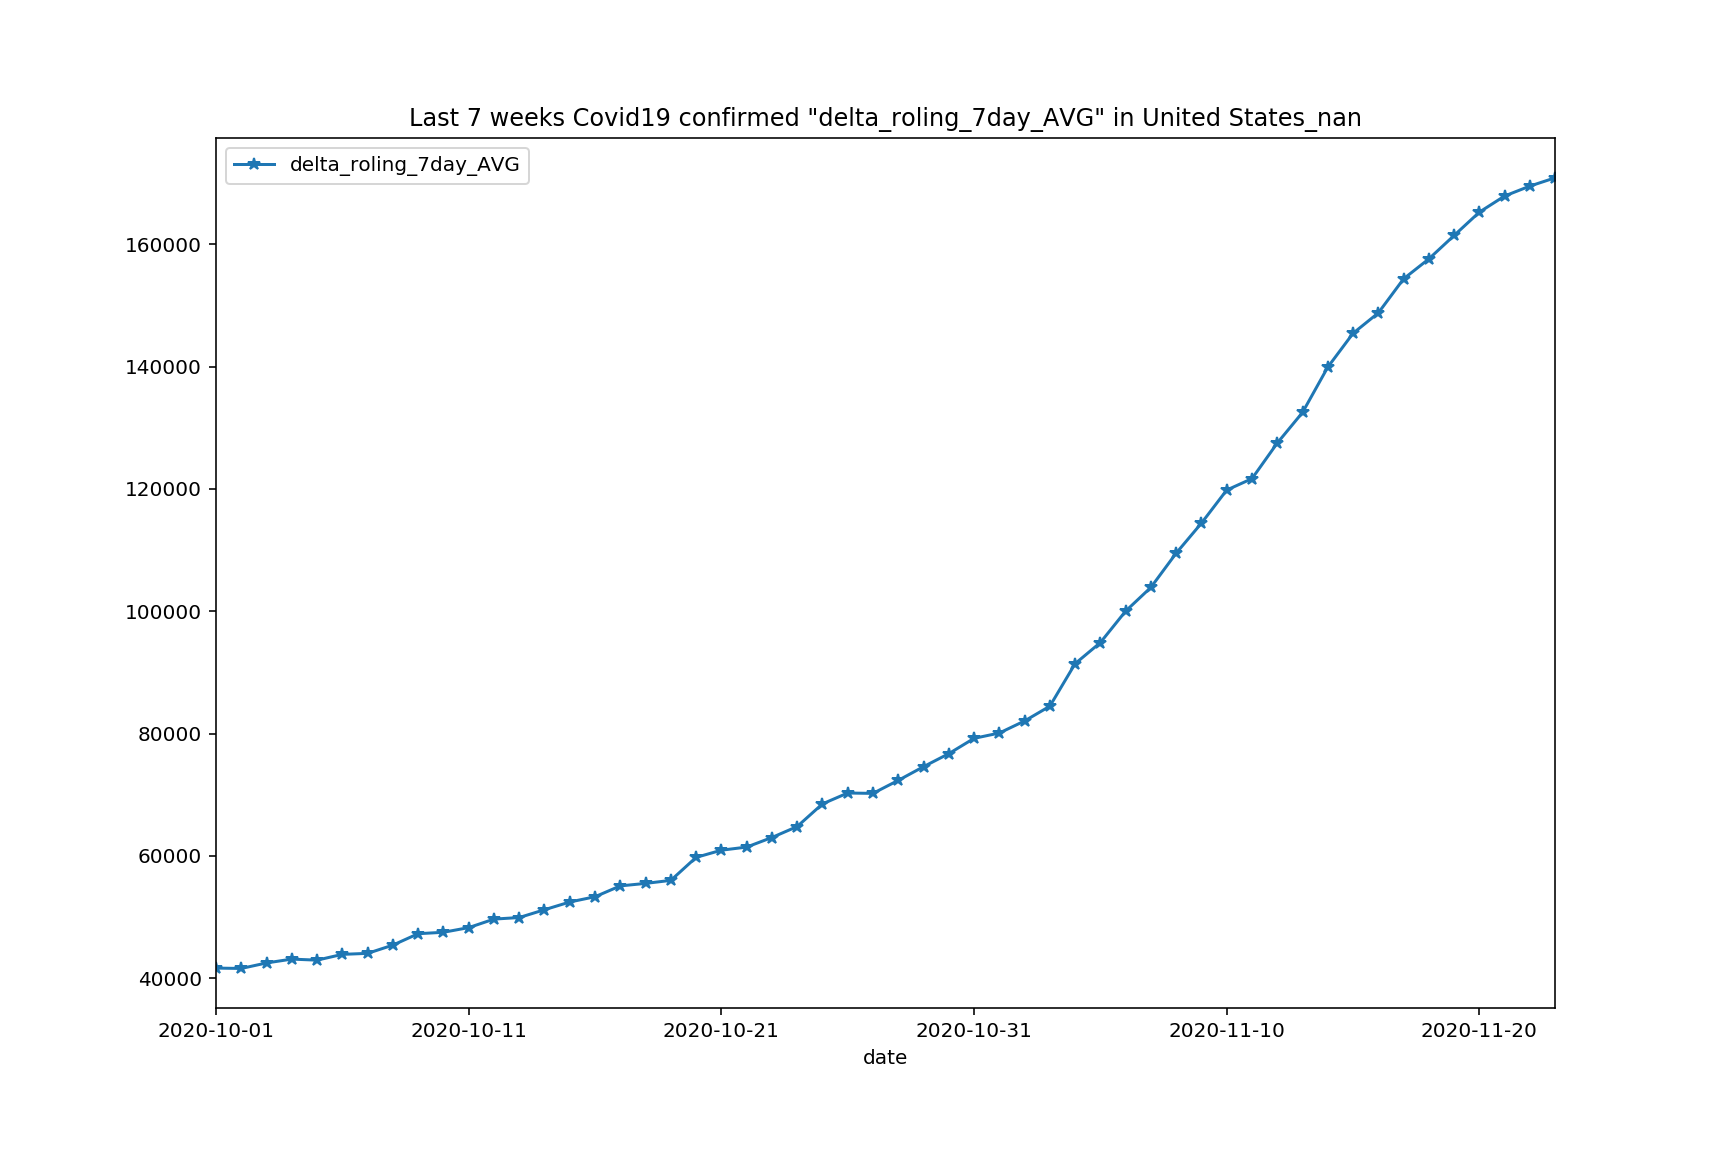

In [49]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


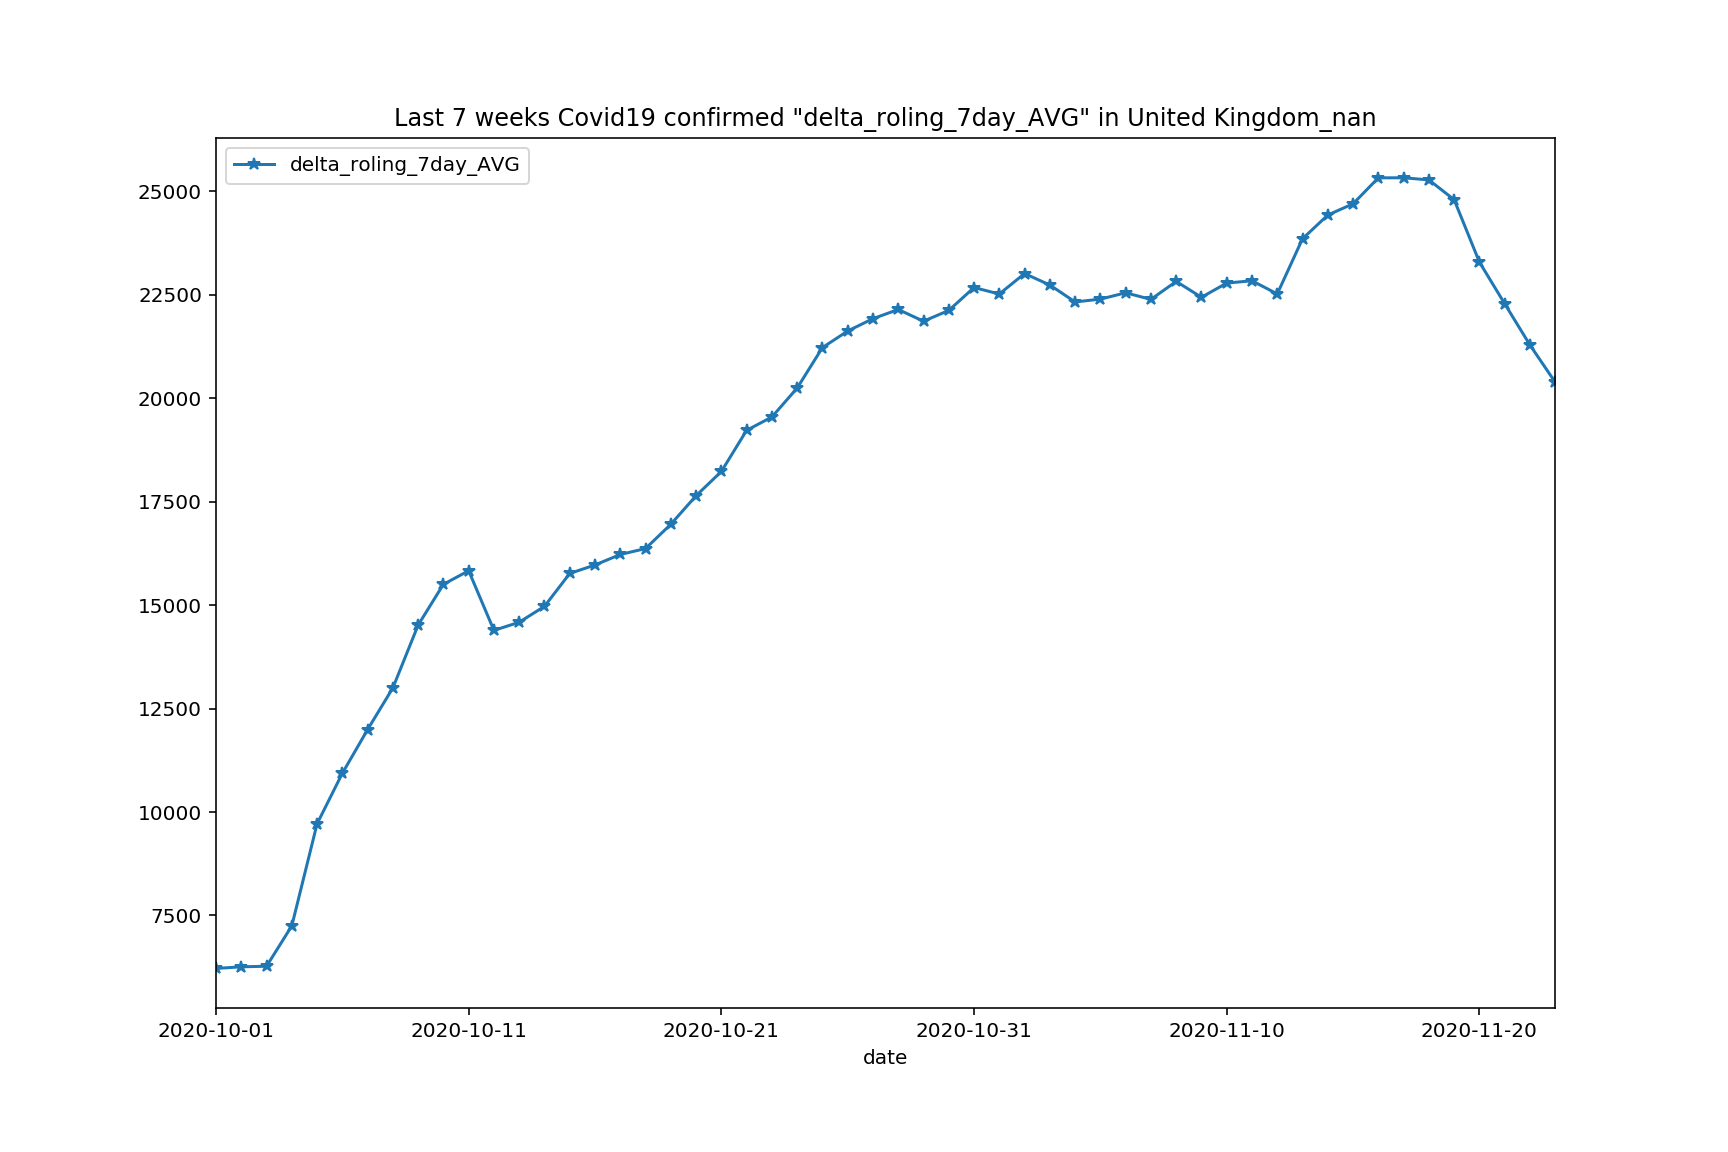

In [50]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


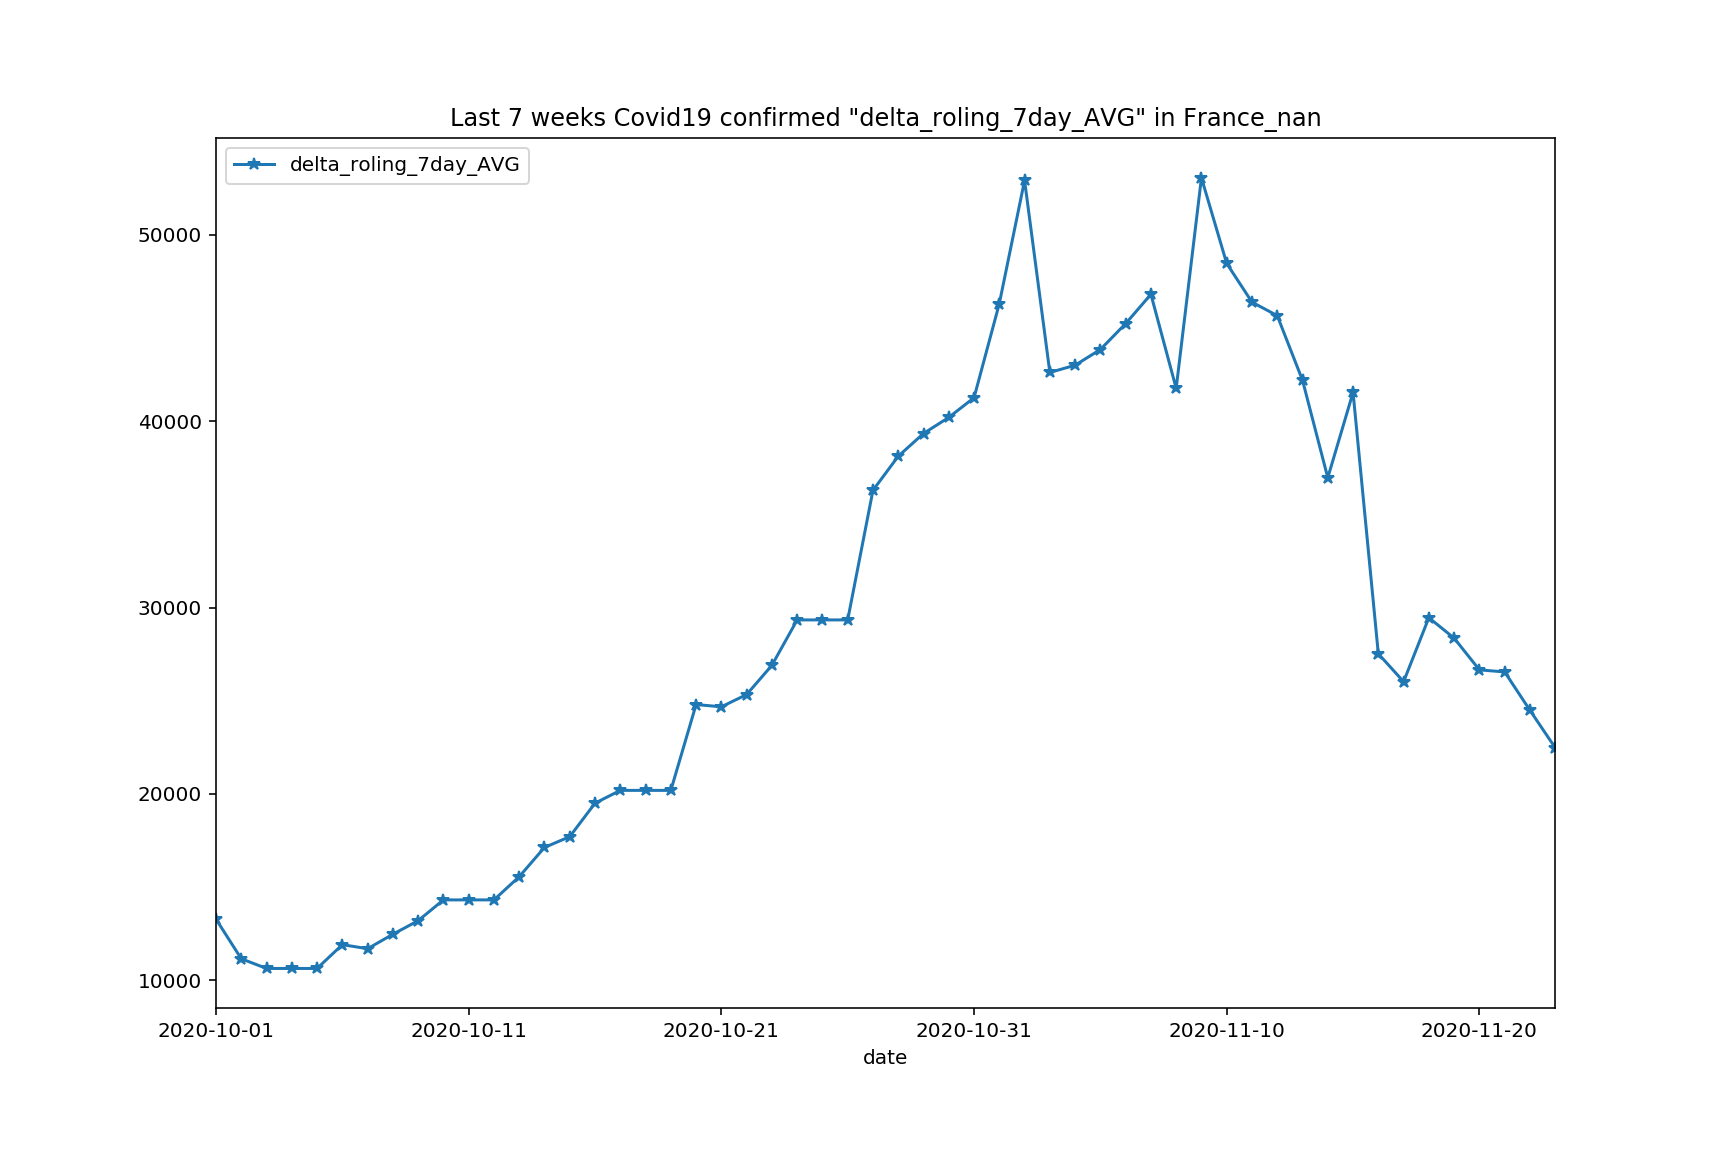

In [51]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


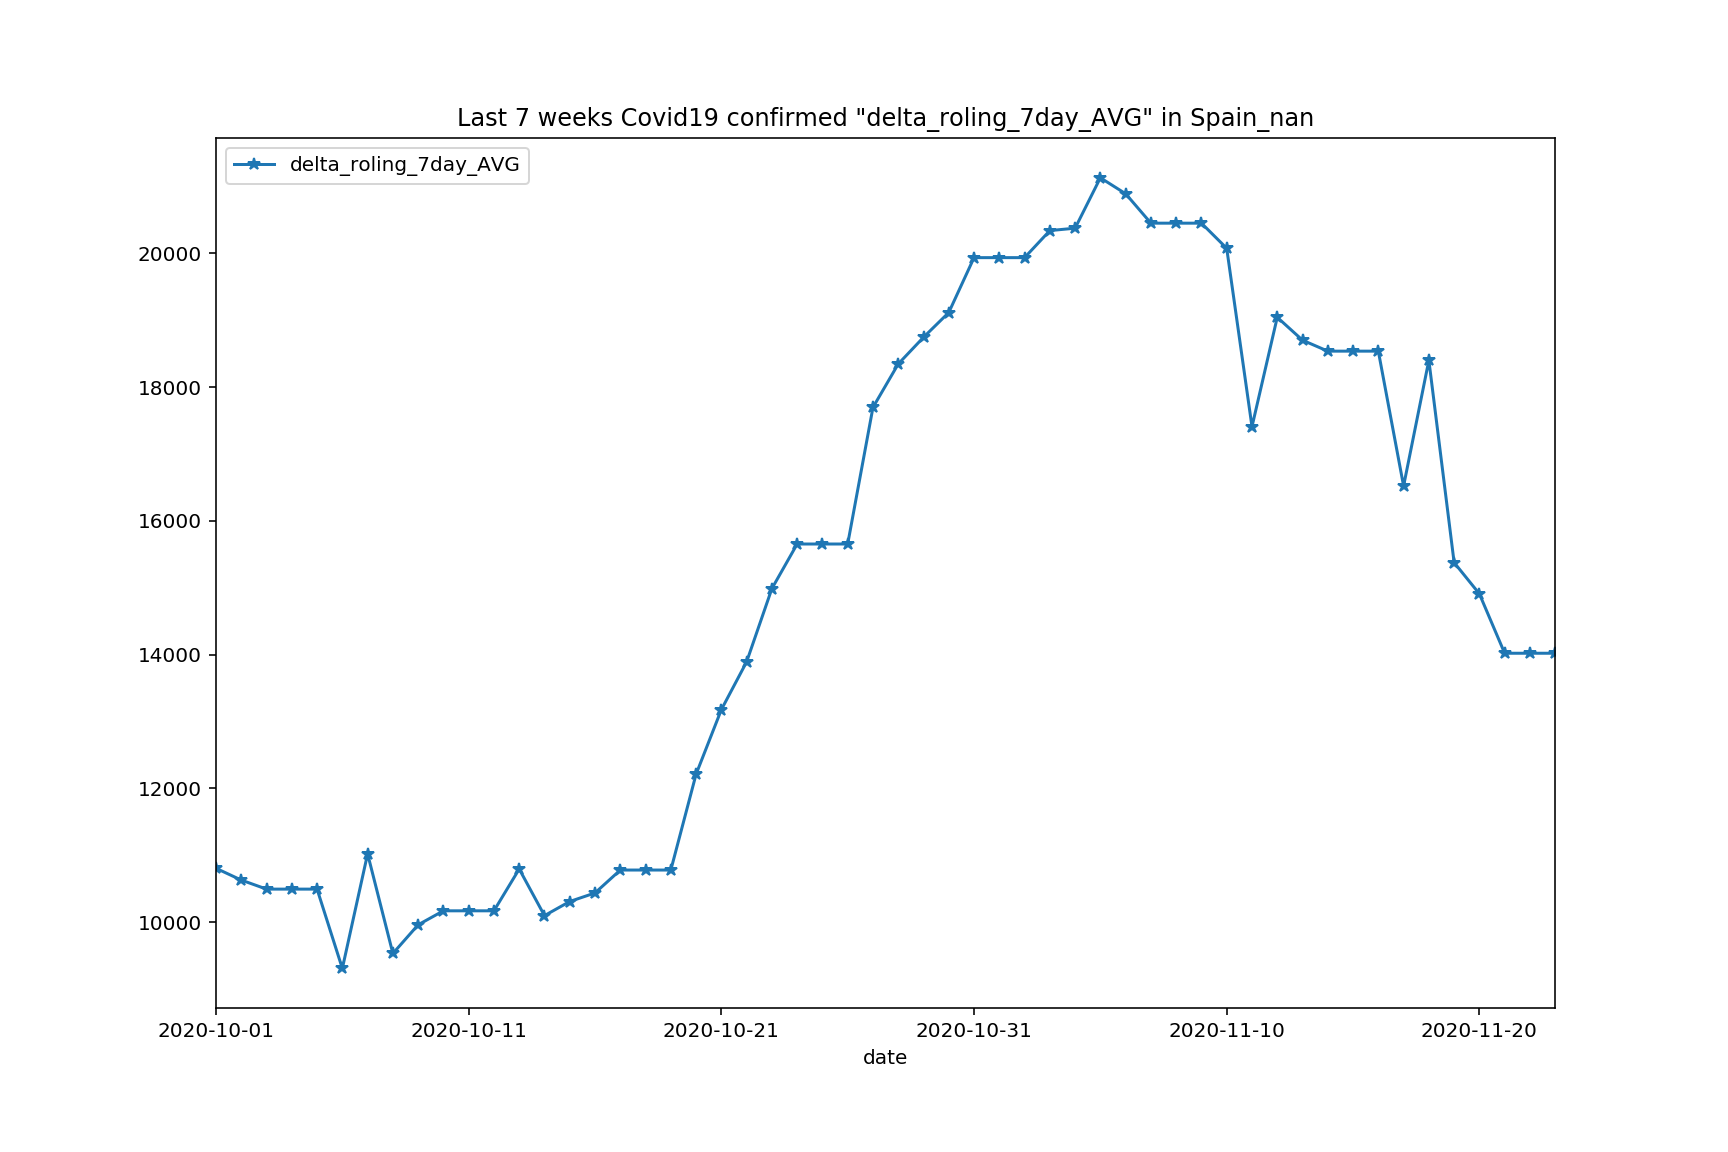

In [52]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


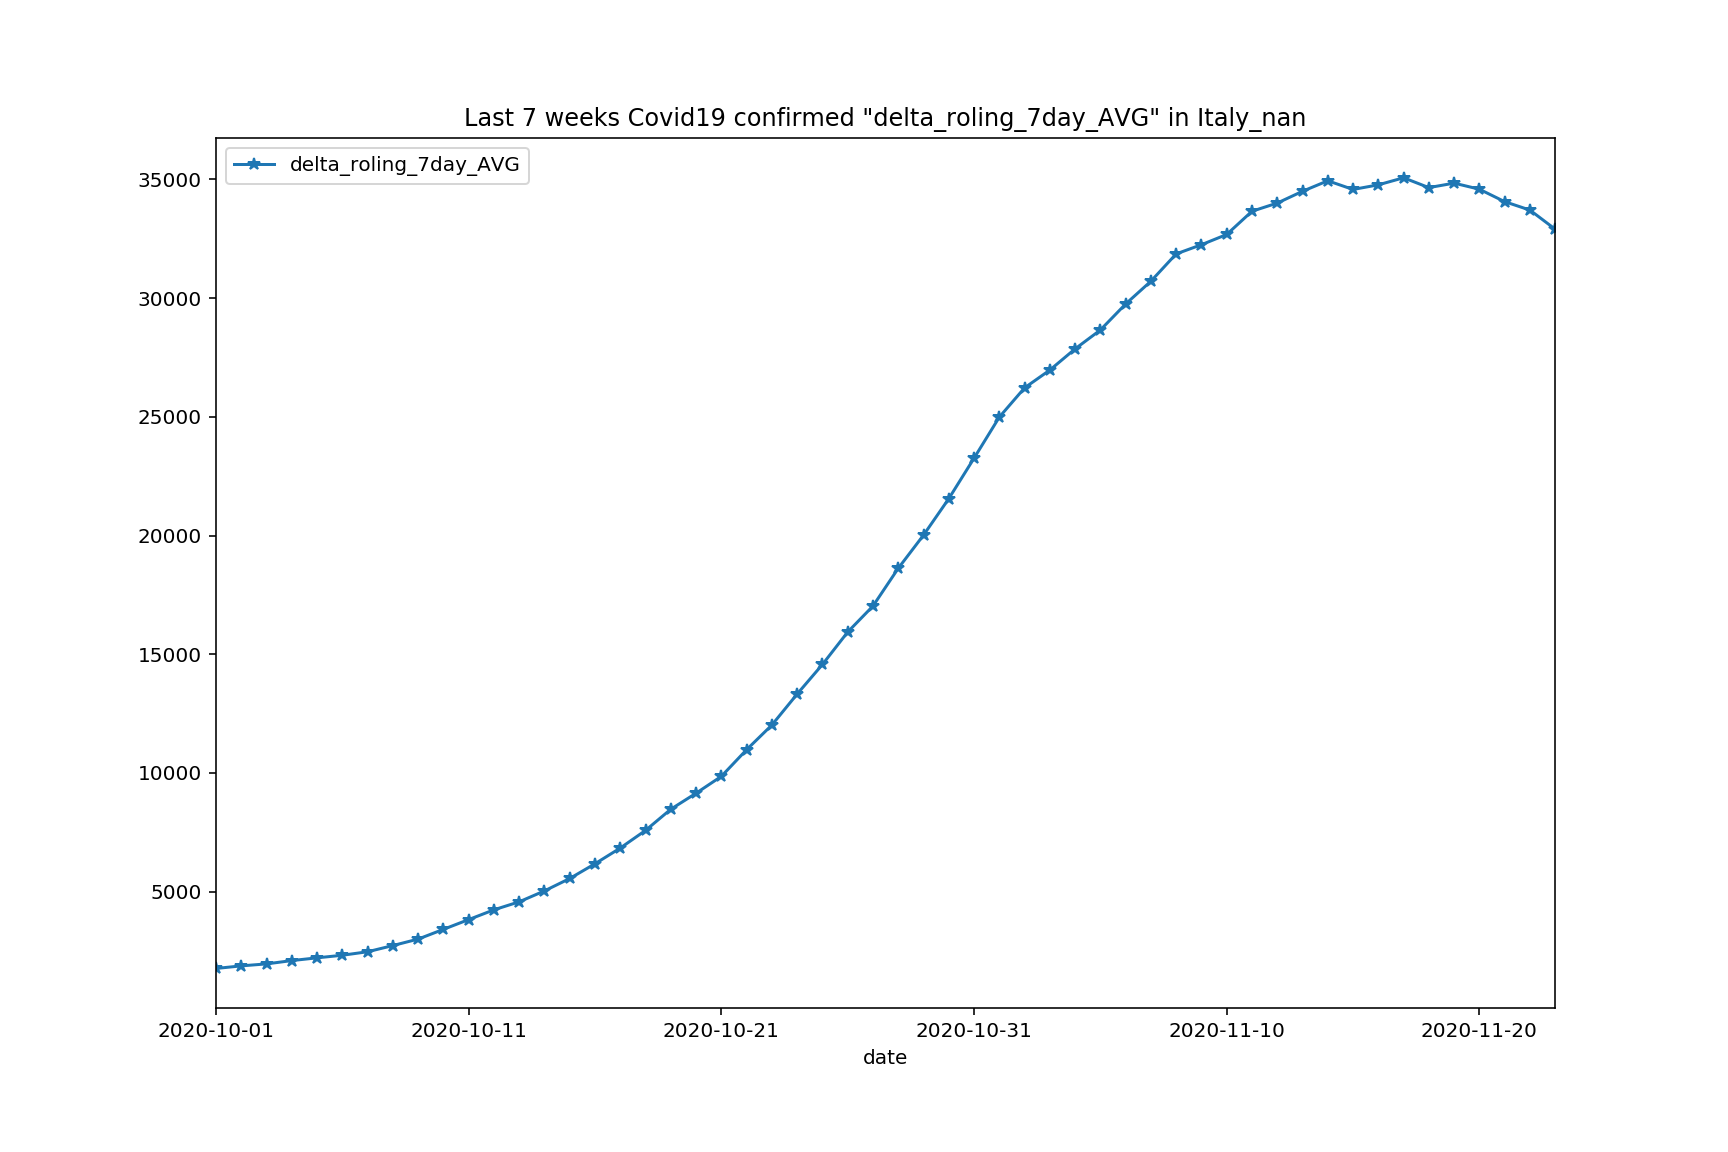

In [53]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


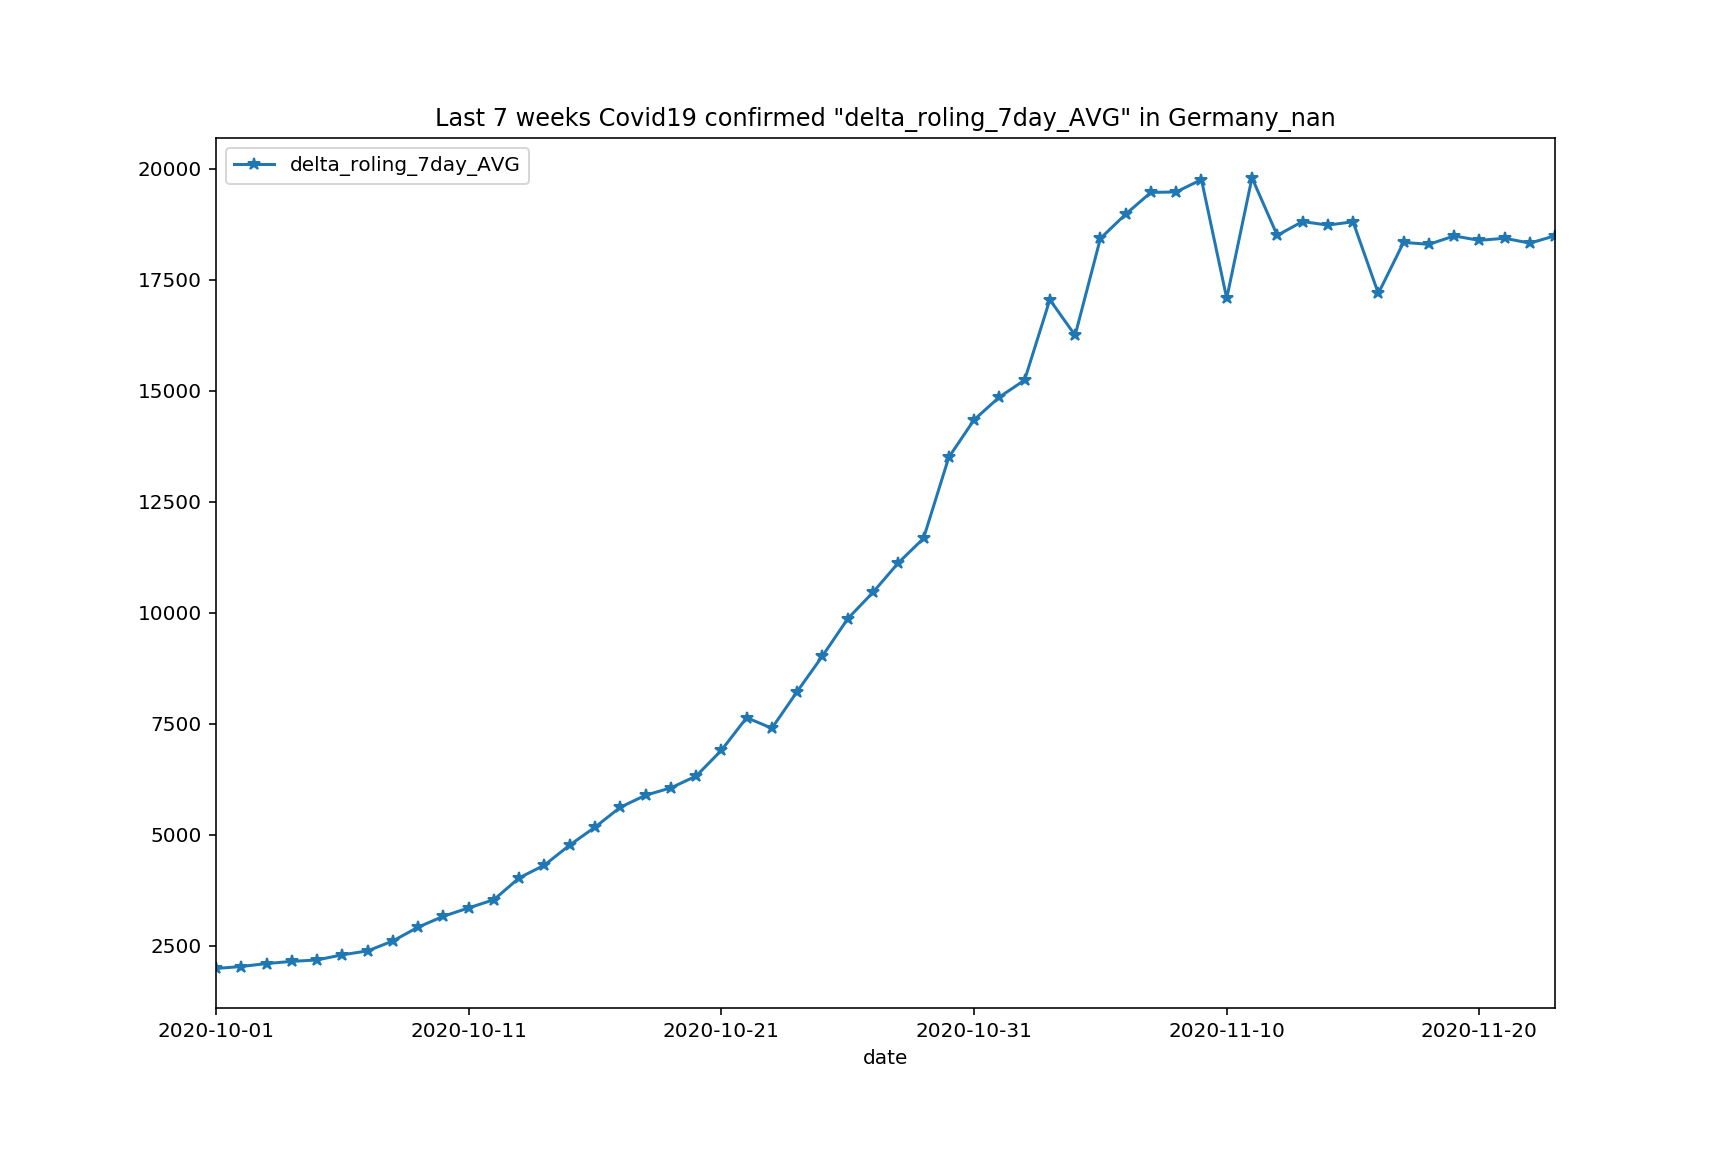

In [54]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


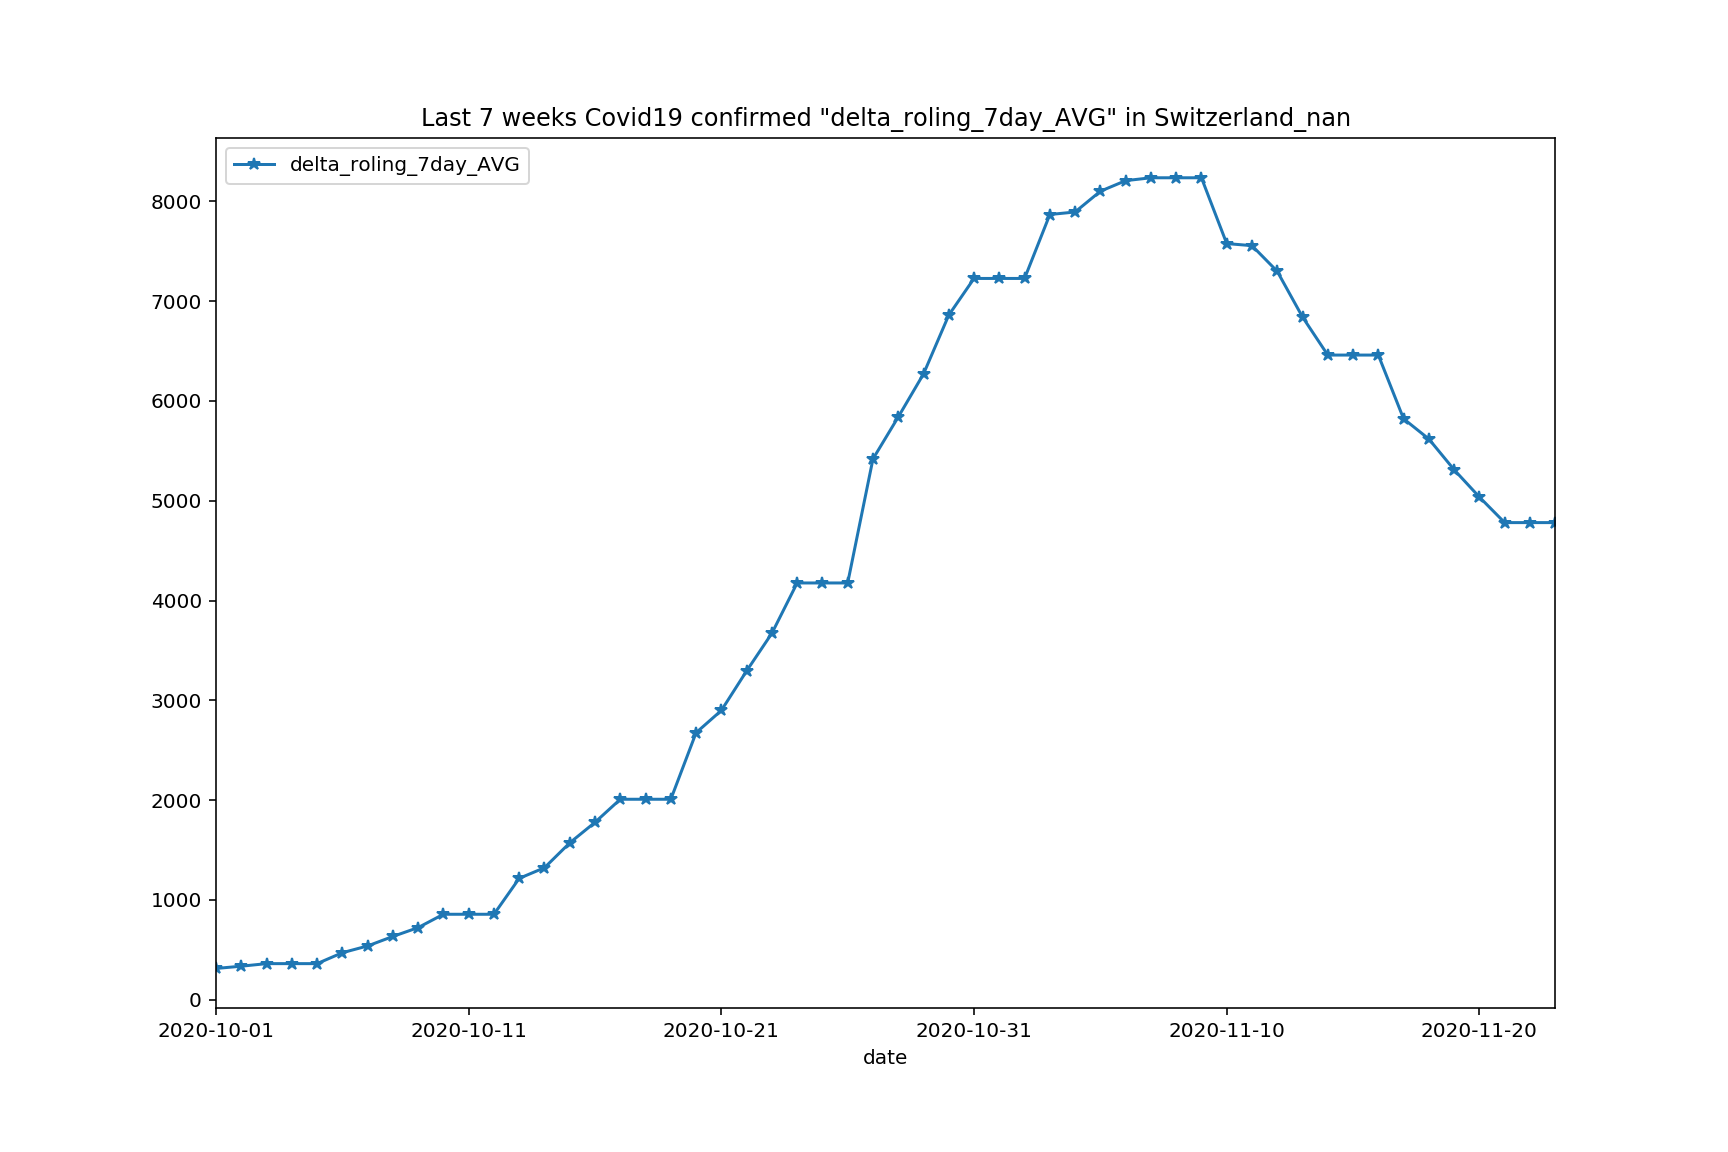

In [55]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


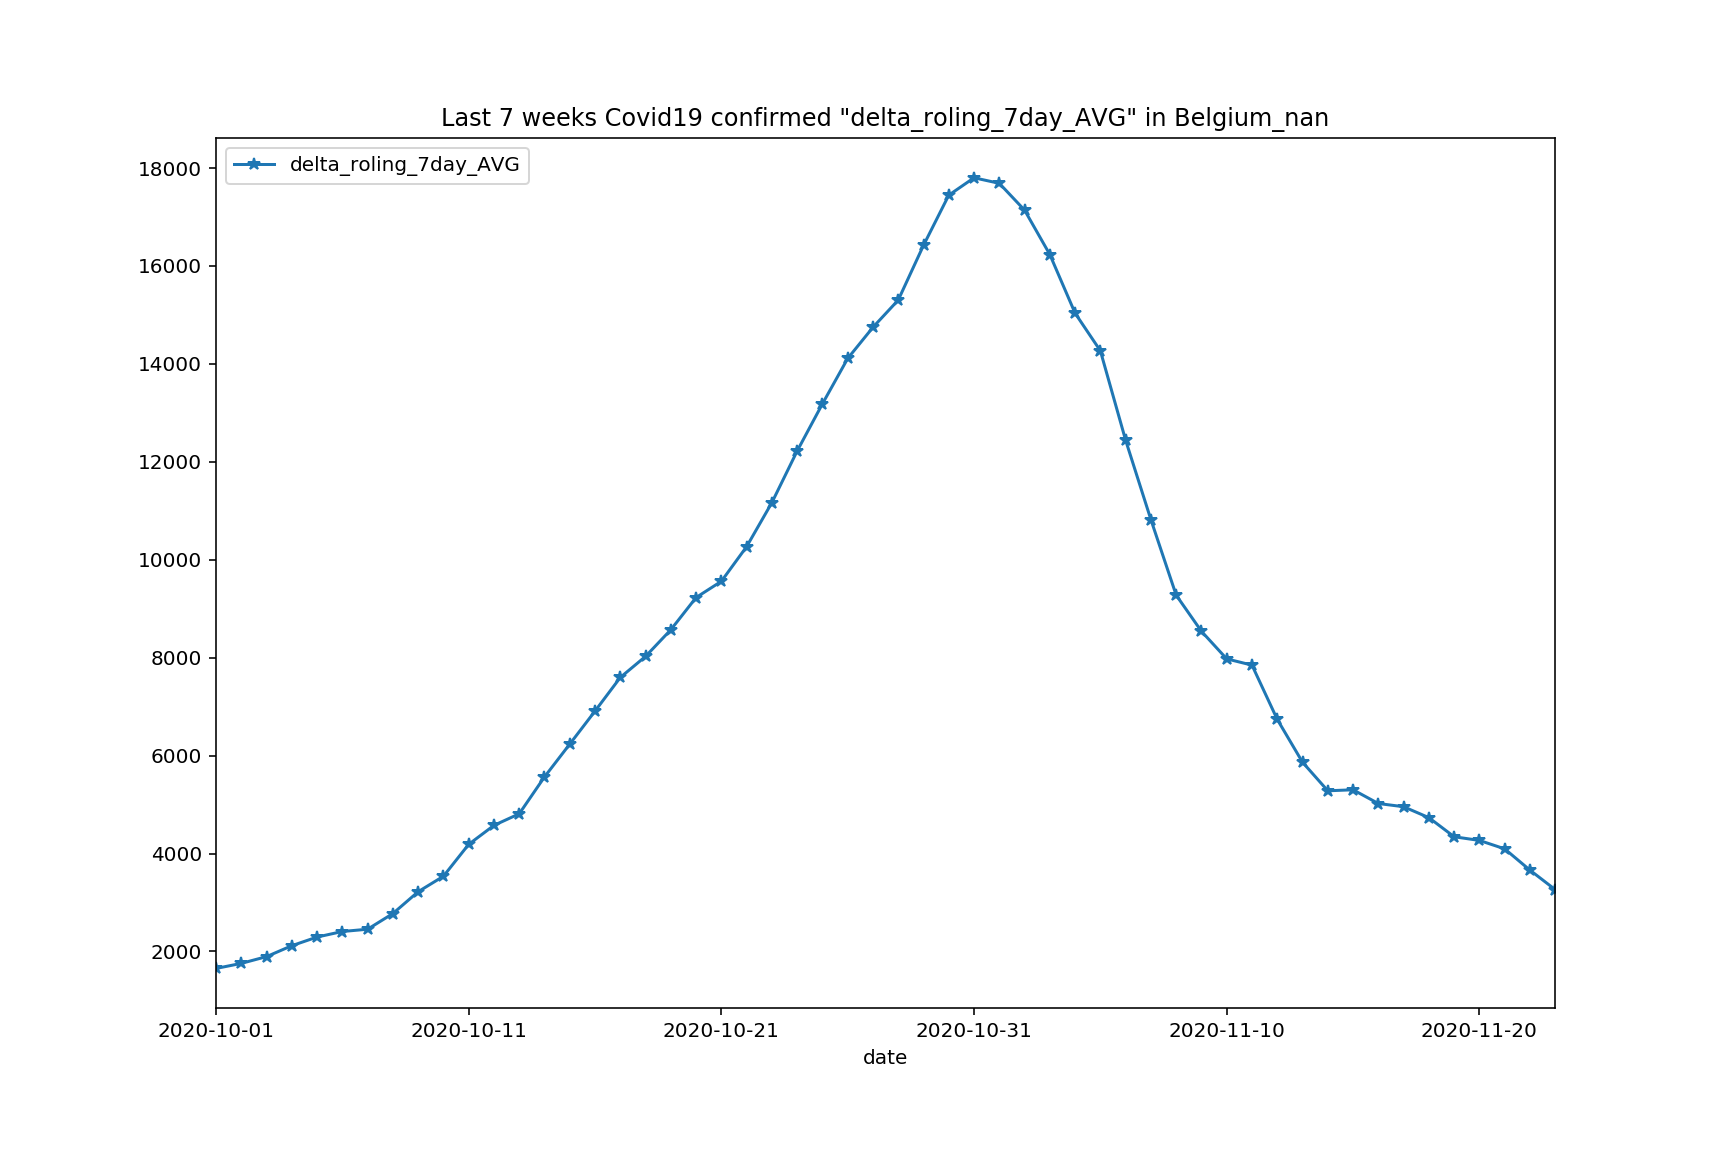

In [56]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


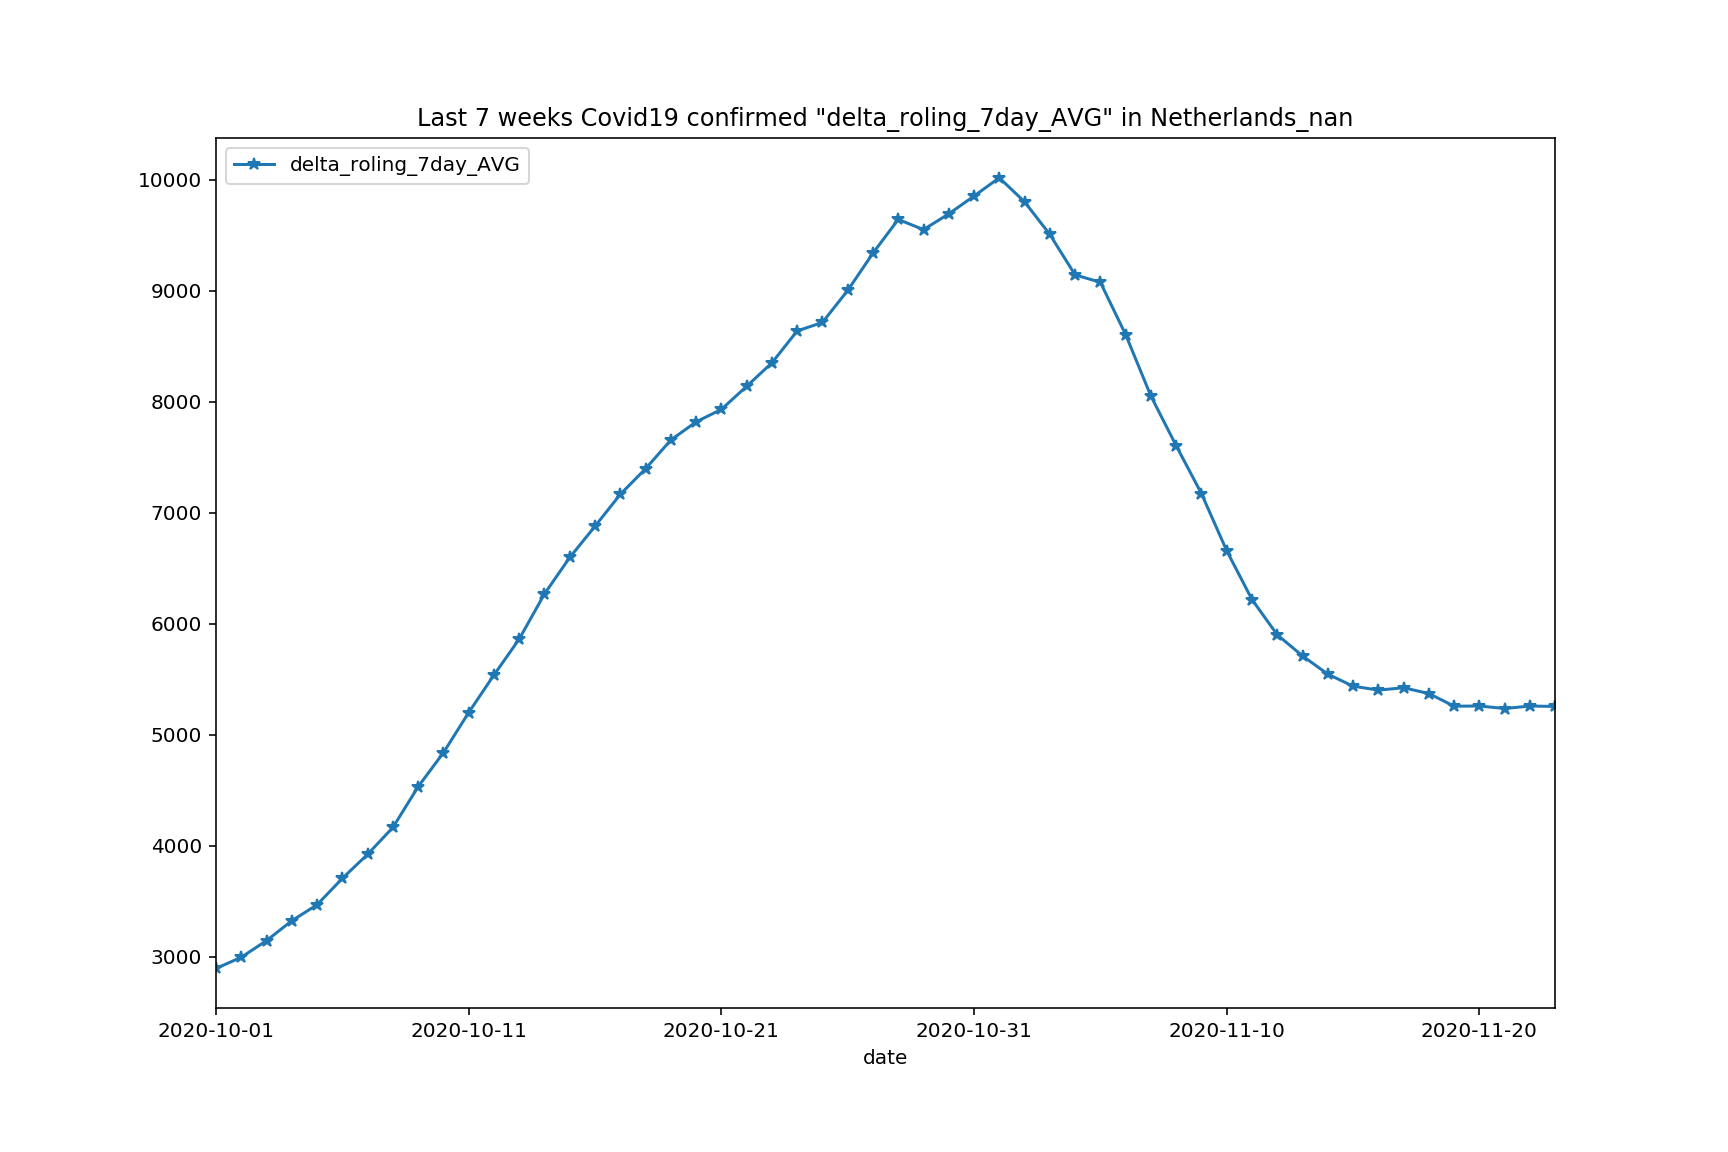

In [57]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


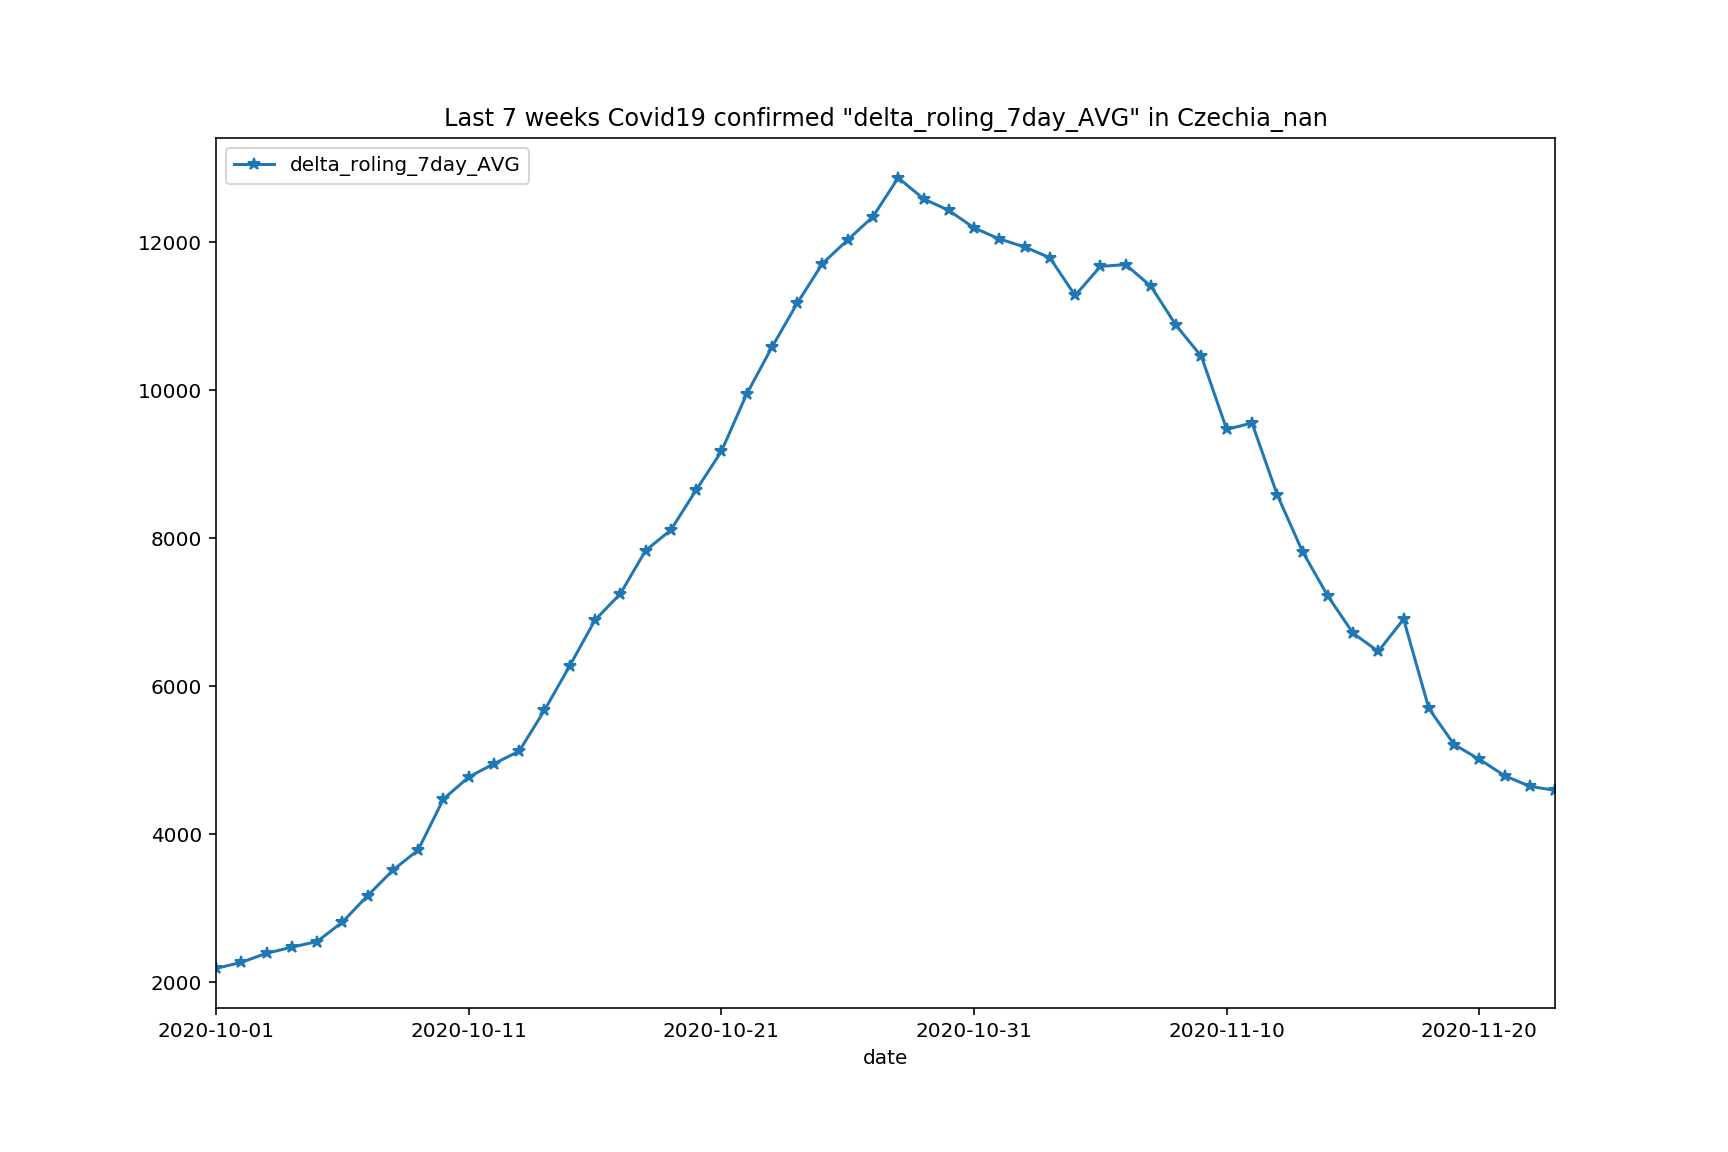

In [58]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


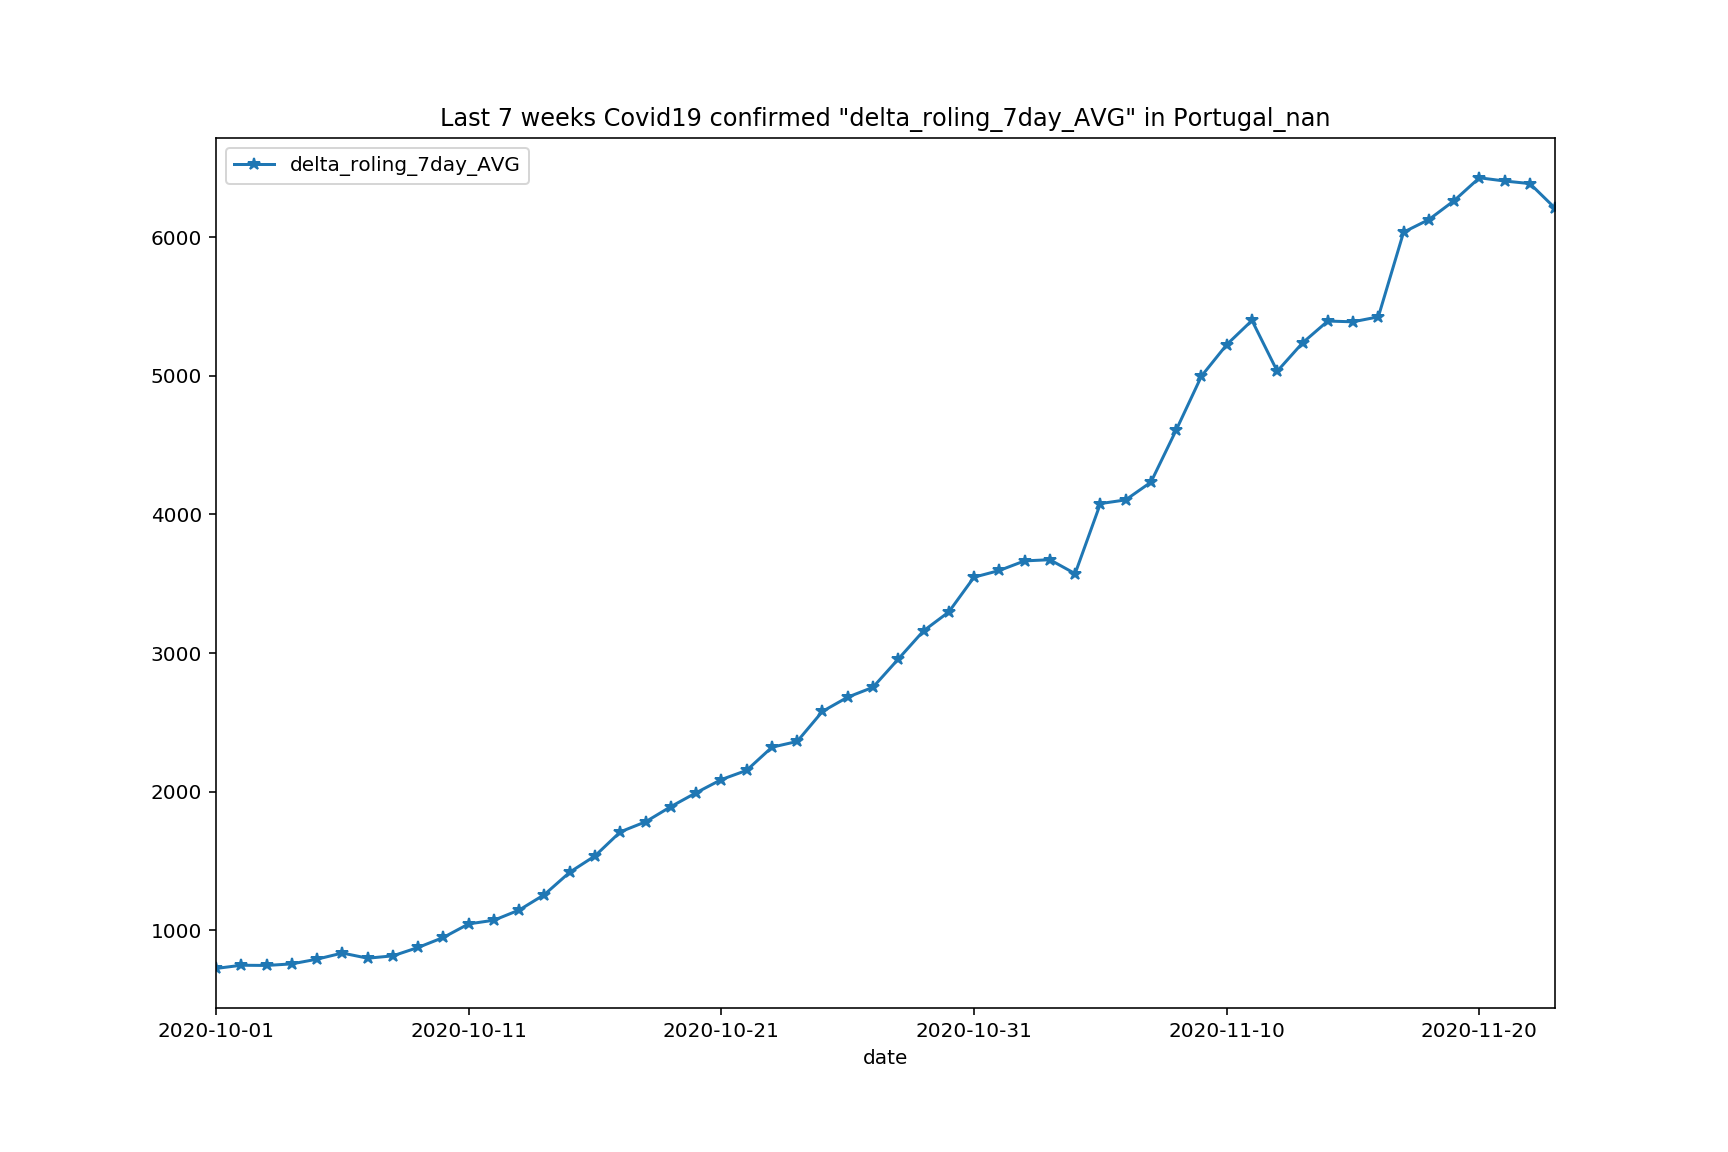

In [59]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [60]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [61]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
